In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set() # setting seaborn default for plots

# removing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

In [4]:
#importing the dataset
df = pd.read_csv("/Users/suchirmvelpanur/Desktop/Projects/Miscellaneous Coursework/Used-Cars-Project-Using-Spark/used_cars_data_sampled.csv", index_col='vin')
df

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/3938735258.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/suchirmvelpanur/Desktop/Projects/Miscellaneous Coursework/Used-Cars-Project-Using-Spark/used_cars_data_sampled.csv", index_col='vin')


,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
vin,,,,,,,,,,,,,,,,,,,,,
1G6DX5RK3L0126388,37.9 in,NaN,NaN,NaN,Sedan,NaN,Bay Shore,21.000,NaN,195,...,A,Automatic,t87865,Luxury Sedan AWD,NaN,AWD,All-Wheel Drive,116 in,80.3 in,2020
W1Y4EBHY8LT026515,--,NaN,NaN,NaN,Van,NaN,Paramus,NaN,NaN,66,...,A,Automatic,t93032,2500 144 V6 Standard Roof Cargo Van RWD,NaN,4X2,4X2,144.3 in,92.3 in,2020
5UXTY9C04M9D96295,NaN,NaN,NaN,NaN,SUV / Crossover,NaN,Bridgeport,NaN,NaN,18,...,A,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
3VWD17AJ3FM302075,38.1 in,NaN,NaN,NaN,Sedan,NaN,Huntington,25.000,NaN,12,...,A,Automatic,t56177,SE,NaN,FWD,Front-Wheel Drive,104.4 in,70 in,2015
5FNYF8H5XLB016437,39.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,Cambridge,19.000,NaN,20,...,A,9-Speed Automatic,t90156,EX-L AWD,NaN,AWD,All-Wheel Drive,111 in,78.6 in,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JTND4RBE1L3083231,29.9 in,NaN,NaN,NaN,Hatchback,NaN,Salinas,NaN,NaN,276,...,NaN,NaN,t85115,SE FWD,NaN,FWD,Front-Wheel Drive,103.9 in,70.5 in,2020
3GCUYEEDXLG427981,43.4 in,NaN,--,69.9 in,Pickup Truck,NaN,Clovis,16.000,NaN,13,...,A,8-Speed Automatic,t86486,RST Crew Cab 4WD,NaN,4WD,Four-Wheel Drive,147.4 in,81.2 in,2020
2GNAXKEVXK6143720,39.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,Selma,NaN,NaN,16,...,A,6-Speed Automatic Overdrive,t79055,1.5T LT FWD,NaN,FWD,Front-Wheel Drive,107.3 in,72.6 in,2019


In [5]:
# sanity check
df.head(10)

,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
vin,,,,,,,,,,,,,,,,,,,,,
1G6DX5RK3L0126388,37.9 in,NaN,NaN,NaN,Sedan,NaN,Bay Shore,21.000,NaN,195,...,A,Automatic,t87865,Luxury Sedan AWD,NaN,AWD,All-Wheel Drive,116 in,80.3 in,2020
W1Y4EBHY8LT026515,--,NaN,NaN,NaN,Van,NaN,Paramus,NaN,NaN,66,...,A,Automatic,t93032,2500 144 V6 Standard Roof Cargo Van RWD,NaN,4X2,4X2,144.3 in,92.3 in,2020
5UXTY9C04M9D96295,NaN,NaN,NaN,NaN,SUV / Crossover,NaN,Bridgeport,NaN,NaN,18,...,A,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
3VWD17AJ3FM302075,38.1 in,NaN,NaN,NaN,Sedan,NaN,Huntington,25.000,NaN,12,...,A,Automatic,t56177,SE,NaN,FWD,Front-Wheel Drive,104.4 in,70 in,2015
5FNYF8H5XLB016437,39.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,Cambridge,19.000,NaN,20,...,A,9-Speed Automatic,t90156,EX-L AWD,NaN,AWD,All-Wheel Drive,111 in,78.6 in,2020
19UUB2F64JA005573,34.5 in,NaN,NaN,NaN,Sedan,NaN,Bridgewater,NaN,NaN,29,...,A,Automatic,t74015,V6 FWD with Technology and A-Spec Package,NaN,FWD,Front-Wheel Drive,109.3 in,73 in,2018
2GNFLNE37D6425169,39.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bristol,16.000,NaN,55,...,A,Automatic,t44426,2LT AWD,NaN,AWD,All-Wheel Drive,112.5 in,72.5 in,2013
1C6SRFFT5LN266020,45.2 in,NaN,--,67.4 in,Pickup Truck,Crew Cab,Dartmouth,15.000,NaN,210,...,A,Automatic,t86929,Big Horn Crew Cab 4WD,NaN,4WD,Four-Wheel Drive,144.6 in,82.1 in,2020
1V26C2CAXLC206073,40.4 in,NaN,NaN,NaN,SUV / Crossover,NaN,Canton,18.000,NaN,182,...,A,8-Speed Automatic,t91015,2.0T SE 4Motion with Technology,NaN,AWD,All-Wheel Drive,117.3 in,78.4 in,2020


In [6]:
# checking the shape of the dataset
shape = df.shape

print(f"The shape of the dataframe is {shape[0]} rows and {shape[1]} columns")

The shape of the dataframe is 146792 rows and 65 columns


In [7]:
# checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146792 entries, 1G6DX5RK3L0126388 to 1N4AL3AP0JC274037
Data columns (total 65 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   back_legroom             138872 non-null  object 
 1   bed                      902 non-null     object 
 2   bed_height               21037 non-null   object 
 3   bed_length               21037 non-null   object 
 4   body_type                146119 non-null  object 
 5   cabin                    3103 non-null    object 
 6   city                     146792 non-null  object 
 7   city_fuel_economy        122486 non-null  float64
 8   combine_fuel_economy     0 non-null       float64
 9   daysonmarket             146792 non-null  int64  
 10  dealer_zip               146792 non-null  object 
 11  description              142899 non-null  object 
 12  engine_cylinders         141862 non-null  object 
 13  engine_displacement      138217 non-n

In [8]:
# summary statistics of numeric columns
df.describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,122486.000,0.000,146792.000,138217.000,122486.000,138217.000,0.000,146792.000,146792.000,146792.000,139603.000,72152.000,146792.000,146792.000,144733.000,146788.000,0.000,146792.000
mean,22.729,NaN,76.162,2966.003,29.501,247.795,NaN,36.991,275487549.298,-90.636,31696.202,1.529,29938.500,544.083,4.271,233327.151,NaN,2017.749
std,8.861,NaN,109.330,1349.371,7.791,90.480,NaN,5.001,8944355.923,13.889,271369.947,0.912,18751.306,1034.384,0.512,132205.620,NaN,4.139
min,9.000,NaN,0.000,700.000,10.000,63.000,NaN,18.347,95357213.000,-157.902,0.000,1.000,250.000,0.000,1.000,41593.000,NaN,1923.000
25%,18.000,NaN,14.000,2000.000,25.000,175.000,NaN,33.512,274575526.000,-97.087,6.000,1.000,18478.000,0.000,4.000,63420.000,NaN,2017.000
50%,21.000,NaN,35.000,2500.000,29.000,243.000,NaN,37.866,278551541.500,-87.249,7830.000,1.000,26485.000,0.000,4.340,281467.000,NaN,2020.000
75%,26.000,NaN,82.000,3600.000,33.000,300.000,NaN,41.005,280448739.750,-80.463,43575.500,2.000,38270.500,773.000,4.600,336385.000,NaN,2020.000
max,127.000,NaN,2194.000,8400.000,127.000,797.000,NaN,61.129,282022170.000,-66.079,99999988.000,13.000,1400000.000,55489.000,5.000,440501.000,NaN,2021.000


In [9]:
# checking for duplicate rows
duplucate_rows = df.duplicated().sum()

print(f"The number of duplicate rows are {duplucate_rows}.")

The number of duplicate rows are 1.


In [10]:
# dividing the duplicate rows by the total rows to get the percentage
percentage = duplucate_rows/df.shape[0]*100

print(f"The percentage of duplicate rows is {percentage}%.")

The percentage of duplicate rows is 0.0006812360346612895%.


In [11]:
# setting the duplicated index
duplicate_index = df.duplicated(keep=False)

# calling the duplicated index in a dataframe
df.loc[duplicate_index, :].sort_index()

,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
vin,,,,,,,,,,,,,,,,,,,,,
5N1AT2MV6LC789928,37.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,Columbus,25.000,NaN,166,...,CVT,Continuously Variable Transmission,t86700,SV AWD,NaN,AWD,All-Wheel Drive,106.5 in,72.4 in,2020
5N1AT2MV6LC789928,37.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,Columbus,25.000,NaN,166,...,CVT,Continuously Variable Transmission,t86700,SV AWD,NaN,AWD,All-Wheel Drive,106.5 in,72.4 in,2020


In [12]:
# making a copy with the duplicated rows dropped
df2 = df.drop_duplicates().copy()

# checking for duplicate rows in the new dataframe
dup = df2.duplicated().sum()

print(f"The number of duplicate rows are {dup}.")

The number of duplicate rows are 0.


In [13]:
# sanity check
df2.shape

(146791, 65)

In [14]:
# checking for the total amount of null values
df2.isnull().sum()

back_legroom              7920
bed                     145889
bed_height              125754
bed_length              125754
body_type                  673
                         ...  
wheel_system              7315
wheel_system_display      7315
wheelbase                 7920
width                     7920
year                         0
Length: 65, dtype: int64

In [15]:
# checking for the total amount of null values as a percentage.
df2.isna().sum()/df2.shape[0]*100

back_legroom            5.395
bed                    99.386
bed_height             85.669
bed_length             85.669
body_type               0.458
                        ...  
wheel_system            4.983
wheel_system_display    4.983
wheelbase               5.395
width                   5.395
year                    0.000
Length: 65, dtype: float64

In [ ]:
# Task 1 - Delete columns containing more than 20% null values 

In [16]:
percentage = 20
min_count =  int(((100-percentage)/100)*df2.shape[0] + 1)
cars_df = df2.dropna(axis=1, thresh=min_count)

print(f"The columns with {percentage}% or more null values are: {df2.columns[df2.isna().sum()/df2.shape[0]*100 > percentage]}")
print(f"The new shape of the dataframe is {cars_df.shape[0]} rows and {cars_df.shape[1]} columns.")

The columns with 20% or more null values are: Index(['bed', 'bed_height', 'bed_length', 'cabin', 'combine_fuel_economy',
       'fleet', 'frame_damaged', 'has_accidents', 'isCab', 'is_certified',
       'is_cpo', 'is_oemcpo', 'owner_count', 'salvage', 'theft_title',
       'vehicle_damage_category'],
      dtype='object')
The new shape of the dataframe is 146791 rows and 49 columns.


In [17]:
# checking how many null values are in the dataframe that are over 0%
percentage = cars_df.isna().sum()/cars_df.shape[0]*100

pd.DataFrame(percentage[percentage > 0])

,0
back_legroom,5.395
body_type,0.458
city_fuel_economy,16.558
description,2.652
engine_cylinders,3.359
engine_displacement,5.842
engine_type,3.359
exterior_color,1.691
franchise_make,18.878
front_legroom,5.395


In [18]:
# creating a copy of the dataframe
cars_df2 = cars_df.copy()

In [19]:
# checking for the total amount of null values as a percentage.
percentage = cars_df2['back_legroom'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the back_legroom column is {percentage.round(2)}%.")

The amount of null values in the back_legroom column is 5.4%.


In [20]:
# checking the value counts of the column.
cars_df2['back_legroom'].value_counts()

back_legroom
38.3 in    5486
43.6 in    5036
37.4 in    4303
--         4126
35.7 in    3886
           ... 
23.8 in       1
3.5 in        1
26.6 in       1
22.7 in       1
28 in         1
Name: count, Length: 194, dtype: int64

In [21]:
# checking the unique values of the column.
cars_df2['back_legroom'].unique()

array(['37.9 in', '--', nan, '38.1 in', '39.6 in', '34.5 in', '39.9 in',
       '45.2 in', '40.4 in', '41.7 in', '36.1 in', '36.5 in', '37.2 in',
       '39 in', '37.4 in', '40.7 in', '38.2 in', '38.3 in', '40.6 in',
       '39.7 in', '38.4 in', '33.1 in', '36.3 in', '40.1 in', '38 in',
       '44.4 in', '41.4 in', '38.7 in', '38.6 in', '39.1 in', '34.4 in',
       '33.4 in', '38.5 in', '35.6 in', '32.2 in', '35.2 in', '33.2 in',
       '39.4 in', '27.1 in', '35.1 in', '39.5 in', '32.3 in', '30.4 in',
       '36.6 in', '43.6 in', '35.8 in', '35 in', '35.7 in', '35.9 in',
       '36.2 in', '31.4 in', '40.3 in', '37 in', '34.6 in', '40.9 in',
       '34.7 in', '29.2 in', '36.7 in', '41 in', '34.3 in', '32 in',
       '43.4 in', '38.9 in', '36.8 in', '31.7 in', '42 in', '32.6 in',
       '34 in', '34.8 in', '47.5 in', '33.7 in', '40.2 in', '42.3 in',
       '35.4 in', '41.5 in', '36.4 in', '33.5 in', '39.3 in', '37.3 in',
       '37.6 in', '39.2 in', '38.8 in', '37.5 in', '43.1 in', '33.3

In [22]:
# splitting the back_legroom column and returning only the numeric values.
cars_df2['back_legroom'] = cars_df2['back_legroom'].str.split(' ').str[0]

# replacing the "--" with NaN values
cars_df2['back_legroom'].replace('--', np.nan , inplace=True)

# converting the back_legroom column to a float
cars_df2['back_legroom'] = pd.to_numeric(cars_df2['back_legroom'], downcast='float')

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/1141394945.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['back_legroom'].replace('--', np.nan , inplace=True)


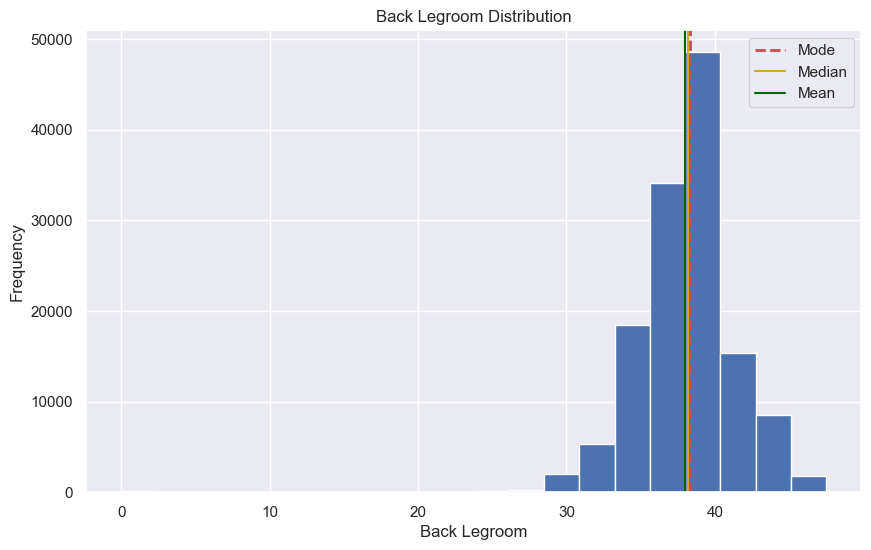

In [23]:
# plotting the distribution of the back_legroom column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['back_legroom'], bins=20)
plt.title('Back Legroom Distribution')
# Add the mode
plt.axvline(cars_df2['back_legroom'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['back_legroom'].median(), color='goldenrod', label='Median')
# Add the mean
plt.axvline(cars_df2['back_legroom'].mean(), color='darkgreen', label='Mean')
plt.legend()
plt.xlabel('Back Legroom')
plt.ylabel('Frequency')
plt.show()

In [24]:
# Checking the mean of the back_legroom column
cars_df2['back_legroom'].mean()

37.96681

In [25]:
# checking for outliers in the back_legroom column
cars_df2.loc[:,['body_type','maximum_seating']][cars_df2['back_legroom'] < 10].value_counts()

body_type        maximum_seating
Pickup Truck     3 seats            94
                 5 seats             1
SUV / Crossover  2 seats             1
Sedan            5 seats             1
Name: count, dtype: int64

In [26]:
# checking for outliers in the back_legroom column that are not pickup trucks
cars_df2.loc[:,['body_type','maximum_seating','back_legroom','make_name',
               'model_name']][(cars_df2['back_legroom'] < 10) & (
                   cars_df2['body_type'] != 'Pickup Truck')]

,body_type,maximum_seating,back_legroom,make_name,model_name
vin,,,,,
JF1GE60689H522144,Sedan,5 seats,3.500,Subaru,Impreza
1J4FA29P02P733351,SUV / Crossover,2 seats,0.000,Jeep,Wrangler


In [28]:
# imputing the null values with the median value
cars_df2['back_legroom'].fillna(cars_df2['back_legroom'].mean(), inplace=True)
 
# checking for the total amount of null values as a percentage.
percentage = cars_df2['back_legroom'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the back_legroom column is {percentage.round(2)}%.")

The amount of null values in the back_legroom column is 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/3620328754.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['back_legroom'].fillna(cars_df2['back_legroom'].mean(), inplace=True)


In [29]:
# checking for the total amount of null values as a percentage.
percentage = cars_df2['body_type'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the body_type column are {percentage.round(2)}%.")

The amount of null values in the body_type column are 0.46%.


In [30]:
# checking the body_type column for the most common body type
cars_df2['body_type'].value_counts()/cars_df2['body_type'].shape*100

body_type
SUV / Crossover   47.134
Sedan             24.625
Pickup Truck      15.903
Hatchback          3.004
Minivan            2.669
Coupe              2.368
Van                1.660
Wagon              1.320
Convertible        0.860
Name: count, dtype: float64

In [31]:
#checking the rows of the null values in the body_type column
cars_df2.loc[:,['body_type','make_name','model_name']][cars_df2['body_type'].isna()]

,body_type,make_name,model_name
vin,,,
4S4WMAFD8M3400614,NaN,Subaru,Ascent
5XXG14J22MG006471,NaN,Kia,K5
5UXCX6C02M9E09708,NaN,BMW,X7
1V2BR2CA8MC520657,NaN,Volkswagen,Atlas
5XXG64J22MG006746,NaN,Kia,K5
...,...,...,...
SALYB2FV0KA212222,NaN,Land Rover,Range Rover Velar
4S4WMAFD9M3402887,NaN,Subaru,Ascent
WBSDZ0C06LCD92810,NaN,BMW,M8


In [32]:
# replacing null values with the most common body type
cars_df2['body_type'].replace(np.nan, 'SUV / Crossover', inplace=True)

# checking for nulls
result = cars_df2['body_type'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the body_type column are {result.round(2)}%.")

The amount of null values in the body_type column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/3224601969.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['body_type'].replace(np.nan, 'SUV / Crossover', inplace=True)


In [ ]:
# TASK 2.1 : Analyse distribution of vehicle types

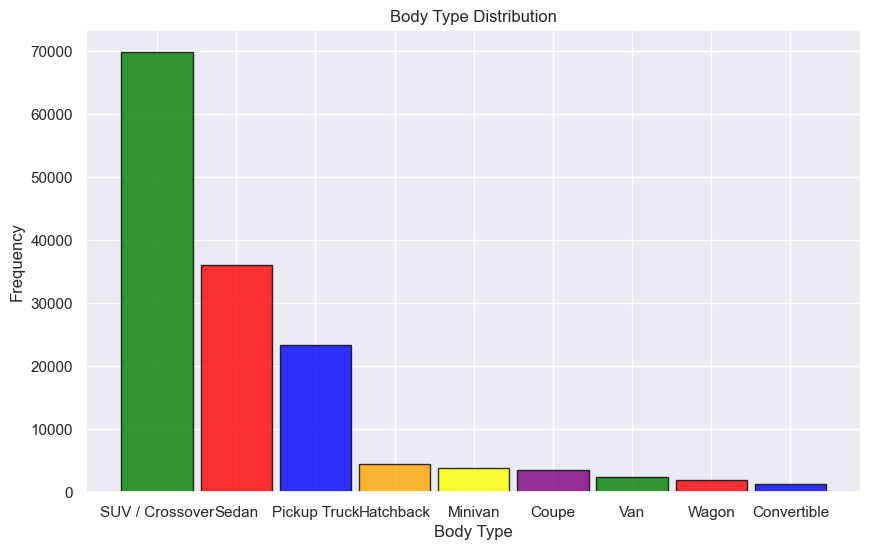

In [33]:
# plotting the distribution of the body_type column
plt.figure(figsize=(10,6))
plt.bar(cars_df2['body_type'].value_counts().index, cars_df2['body_type'].value_counts(),
        color=['green','red','blue','orange','yellow','purple'], alpha=0.8, width=0.9, edgecolor='black')
plt.title('Body Type Distribution')
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.show()


In [34]:
# checking for the total amount of null values as a percentage.
percentage = cars_df2['city_fuel_economy'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the city_fuel_economy column are {percentage.round(2)}%.")

The amount of null values in the city_fuel_economy column are 16.56%.


In [35]:
# checking for the value counts of the column.
cars_df2['city_fuel_economy'].value_counts()

city_fuel_economy
19.000    9624
18.000    9281
22.000    8546
21.000    8282
20.000    8281
          ... 
56.000       1
63.000       1
89.000       1
95.000       1
60.000       1
Name: count, Length: 87, dtype: int64

In [ ]:
# TASK 2.4 : Explore the distribution of city_fuel_economy among various cities

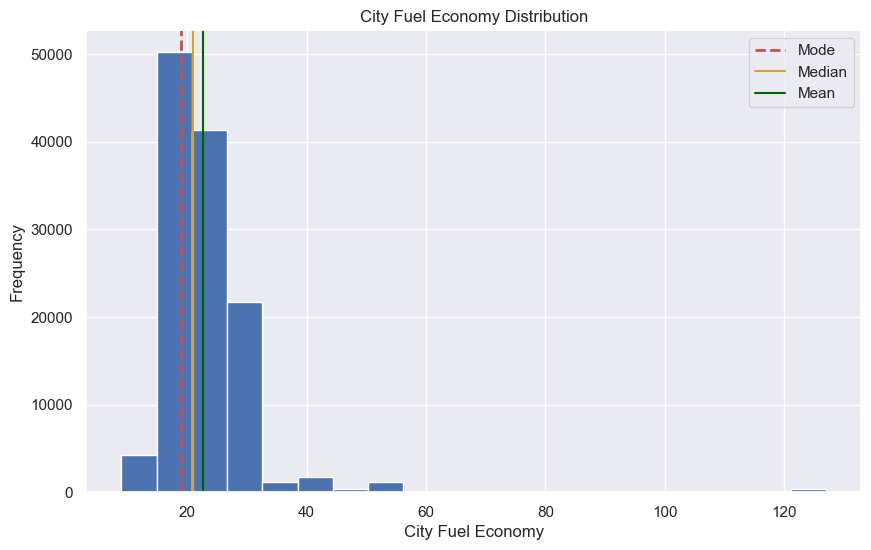

In [36]:
# plotting the distribution of the city_fuel_economy column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['city_fuel_economy'], bins=20)
plt.title('City Fuel Economy Distribution')
# Add the mode
plt.axvline(cars_df2['city_fuel_economy'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['city_fuel_economy'].median(), color='goldenrod', label='Median')
# Add the mean
plt.axvline(cars_df2['city_fuel_economy'].mean(), color='darkgreen', label='Mean')
plt.legend()
plt.xlabel('City Fuel Economy')
plt.ylabel('Frequency')
plt.show()

In [37]:
# checking the outliers in the city_fuel_economy column, anything over 60 mpg is an outlier
cars_df2.loc[:,['make_name','model_name','city_fuel_economy','engine_type','fuel_type']][cars_df2['city_fuel_economy'] > 60]

,make_name,model_name,city_fuel_economy,engine_type,fuel_type
vin,,,,,
WBY7Z6C57JVB96698,BMW,i3,126.000,NaN,Electric
WBAJB1C53JB374617,BMW,5 Series,66.000,I4,Gasoline
KM8K33AG3LU065589,Hyundai,Kona Electric,127.000,NaN,Electric
KMHC75LHXKU044733,Hyundai,Ioniq Electric,127.000,NaN,Electric
KNDCC3LG8L5047542,Kia,Niro EV,123.000,NaN,Electric
...,...,...,...,...,...
KM8K33AG4LU064340,Hyundai,Kona Electric,127.000,NaN,Electric
1G1FY6S08K4101164,Chevrolet,Bolt EV,127.000,NaN,Electric
WVWPR7AU0KW913033,Volkswagen,e-Golf,126.000,NaN,Electric


In [38]:
# replacing null values with the mean of the column
cars_df2['city_fuel_economy'].replace(np.nan, cars_df2['city_fuel_economy'].mean(), inplace=True)

# Null check
result = cars_df2['city_fuel_economy'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the city_fuel_economy column are {result.round(2)}%.")

The amount of null values in the city_fuel_economy column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/2158227795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['city_fuel_economy'].replace(np.nan, cars_df2['city_fuel_economy'].mean(), inplace=True)


In [39]:
# checking how many null values are in the column
percentage = cars_df2['highway_fuel_economy'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the highway_fuel_economy column are {percentage.round(2)}%.")


The amount of null values in the highway_fuel_economy column are 16.56%.


In [40]:
# checking the value counts of the column.
cars_df2['highway_fuel_economy'].value_counts()/cars_df2.shape[0]*100

highway_fuel_economy
27.000    5.500
25.000    5.352
28.000    5.301
30.000    5.214
31.000    4.970
           ... 
117.000   0.001
95.000    0.001
10.000    0.001
74.000    0.001
58.000    0.001
Name: count, Length: 93, dtype: float64

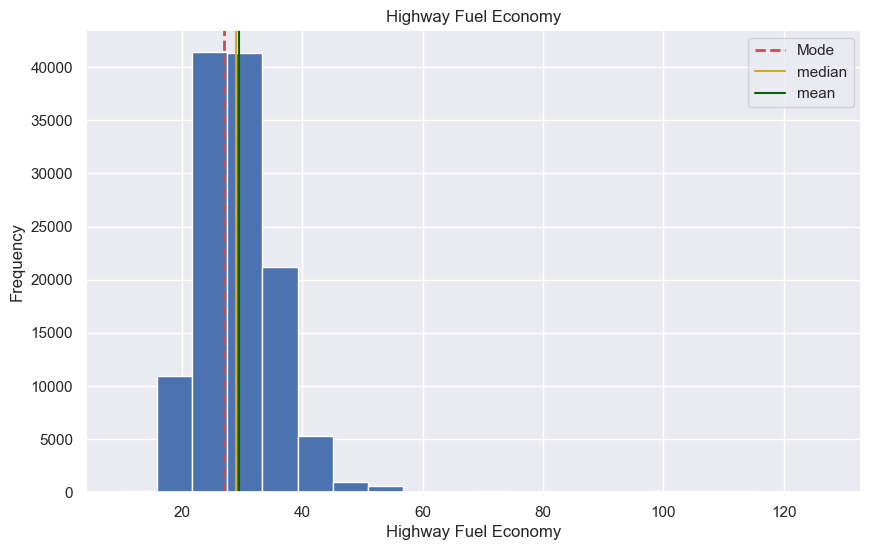

In [41]:
plt.figure(figsize=(10,6))
plt.hist(cars_df2['highway_fuel_economy'], bins=20)
plt.title('Highway Fuel Economy')
# Add the mode
plt.axvline(cars_df2['highway_fuel_economy'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['highway_fuel_economy'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['highway_fuel_economy'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Highway Fuel Economy')
plt.ylabel('Frequency')
plt.show()

In [42]:
# filling the null values with the mean of the column
cars_df2['highway_fuel_economy'].fillna(cars_df2['highway_fuel_economy'].mean(), inplace=True)

# checking the result
result = cars_df2['highway_fuel_economy'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the highway_fuel_economy column are {result.round(2)}%.")

The amount of null values in the highway_fuel_economy column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/3239317922.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['highway_fuel_economy'].fillna(cars_df2['highway_fuel_economy'].mean(), inplace=True)


In [43]:
# combining the city and highway fuel economy columns into a combined fuel economy column
cars_df2['combined_fuel_economy'] = (cars_df2['city_fuel_economy'] + cars_df2['highway_fuel_economy'])/2 

# dropping the city and highway fuel economy columns
cars_df2.drop(['city_fuel_economy','highway_fuel_economy'], axis=1, inplace=True)

# checking the head of the dataframe
cars_df2.head()

,back_legroom,body_type,city,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,...,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,combined_fuel_economy
vin,,,,,,,,,,,,,,,,,,,,,
1G6DX5RK3L0126388,37.900,Sedan,Bay Shore,195,11706,Evergreen Metallic 2020 Cadillac CT5 Luxury AW...,I4,2000.000,I4,Evergreen Metallic,...,A,Automatic,t87865,Luxury Sedan AWD,AWD,All-Wheel Drive,116 in,80.3 in,2020,26.000
W1Y4EBHY8LT026515,37.967,Van,Paramus,66,7652,2775 2020 Mercedes-Benz Sprinter 2500 Cargo 14...,V6 Diesel,3000.000,V6 Diesel,Silver,...,A,Automatic,t93032,2500 144 V6 Standard Roof Cargo Van RWD,4X2,4X2,144.3 in,92.3 in,2020,26.115
5UXTY9C04M9D96295,37.967,SUV / Crossover,Bridgeport,18,6606,"Moonroof, Heated Seats, Nav System, Satellite ...",NaN,NaN,NaN,Black Sapphire Metallic,...,A,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,2021,26.115
3VWD17AJ3FM302075,38.100,Sedan,Huntington,12,11743,2015 Volkswagen Jetta 1.8T SE FWDOdometer is 1...,I4,1800.000,I4,Pure White,...,A,Automatic,t56177,SE,FWD,Front-Wheel Drive,104.4 in,70 in,2015,31.000
5FNYF8H5XLB016437,39.600,SUV / Crossover,Cambridge,20,2138,"[!@@Additional Info@@!]4.334 Axle Ratio,Heated...",V6,3500.000,V6,Obsidian Blue Pearl,...,A,9-Speed Automatic,t90156,EX-L AWD,AWD,All-Wheel Drive,111 in,78.6 in,2020,21.500


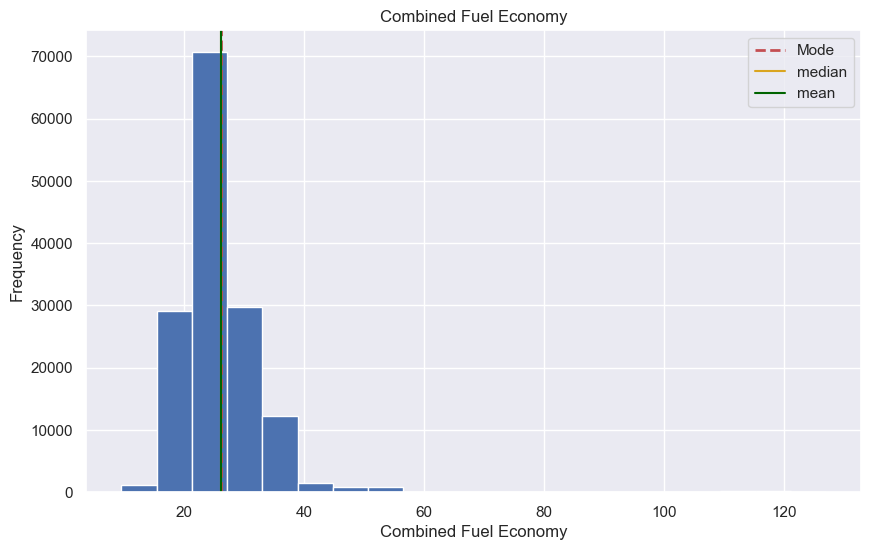

In [44]:
# plotting the distribution of the combined fuel economy column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['combined_fuel_economy'], bins=20)
plt.title('Combined Fuel Economy')
# Add the mode
plt.axvline(cars_df2['combined_fuel_economy'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['combined_fuel_economy'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['combined_fuel_economy'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Combined Fuel Economy')
plt.ylabel('Frequency')
plt.show()

In [45]:
# inspecting the mean, median, and mode of the combined fuel economy column
print(f"The mean of the combined fuel economy column is {cars_df2['combined_fuel_economy'].mean().round(2)} mpg.")

The mean of the combined fuel economy column is 26.11 mpg.


In [46]:
# checking how many null values are in the column
percentage = cars_df2['description'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the description column are {percentage.round(2)}%.")

The amount of null values in the description column are 2.65%.


In [47]:
# checking the value counts of the column
cars_df2['description'].sample(5)

vin
1G1BE5SM8J7110495    Clean CARFAX. CARFAX One-Owner. All Recommende...
19XFC1E39HE029395    Certified. CARFAX One-Owner. MOONROOF, Balance...
3C6UR5HL9LG201616    Purchase this BRAND NEW bold blue 2020 Ram 250...
1N4BL4BV9LC245243    We are excited to offer this 2020 Nissan Altim...
2FMPK4K91GBB03251                                                  NaN
Name: description, dtype: object

In [48]:
# Dropping the description column
cars_df2.drop('description', axis=1, inplace=True)

In [49]:
# checking how many null values are in the column
percentage = cars_df2['combined_fuel_economy'].isna().sum()/cars_df2.shape[0]*100
print(f"The amount of null values in the engine_cylinders column are {percentage.round(2)}%.")

The amount of null values in the engine_cylinders column are 0.0%.


In [50]:
# checking how many null values are in the column
percentage = cars_df2['engine_cylinders'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the engine_cylinders column are {percentage.round(2)}%.")


The amount of null values in the engine_cylinders column are 3.36%.


In [51]:
# checking the value counts of the column.
pd.DataFrame(cars_df2['engine_cylinders'].value_counts()/cars_df2.shape[0]*100)

,count
engine_cylinders,
I4,47.320
V6,24.455
V8,9.321
V8 Flex Fuel Vehicle,2.645
I4 Hybrid,2.463
V6 Flex Fuel Vehicle,2.322
H4,2.198
I3,1.780
I6,0.917


In [52]:
# dropping the column
cars_df2 = cars_df2.drop(['engine_cylinders'], axis=1)

In [53]:
# dropping the column
cars_df2 = cars_df2.drop(['engine_displacement'], axis=1)

In [54]:
# checking how many null values are in the column
percentage = cars_df2['exterior_color'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {percentage}%.")

The amount of null values in the exterior_color column are 1.6908393566363062%.


In [55]:
# checking the value counts of the column.
cars_df2['exterior_color'].value_counts()/cars_df2.shape[0]*100


exterior_color
Black                       5.504
White                       4.069
Summit White                3.288
Silver                      2.621
Gray                        2.527
                             ... 
Light Autumnwood Metallic   0.001
Sparkling Ruby Mica         0.001
Catalina Blue Metallic      0.001
Predawn Grey                0.001
Attitude Blk Me             0.001
Name: count, Length: 6573, dtype: float64

In [56]:
# replacing null values with Black.
cars_df2['exterior_color'].fillna("Black", inplace=True)

# checking result
result = cars_df2['exterior_color'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the exterior_color column are {result.round(2)}%.")

The amount of null values in the exterior_color column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/2442499971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['exterior_color'].fillna("Black", inplace=True)


In [57]:
# making a list of the top exterior colors
colors = ['White', 'Black', 'Gray', 'Silver',
          'Red', 'Blue', 'Brown', 'Green', 'Beige',
          'Orange', 'Gold', 'Yellow', 'Purple']

# extracting the top exterior colors from the exterior_color column
cars_df2['exterior_color'] = cars_df2['exterior_color'].str.findall('|'.join(colors)).apply(set).str.join(', ')

In [58]:
# checking the results
cars_df2['exterior_color'].value_counts()/cars_df2.shape[0]*100

exterior_color
                    23.097
White               20.978
Black               19.784
Silver              11.471
Blue                 7.804
Red                  7.307
Gray                 7.099
Green                0.717
Brown                0.375
Orange               0.354
Gold                 0.309
Beige                0.156
Yellow               0.146
White, Gold          0.099
White, Black         0.044
Purple               0.033
Black, Silver        0.030
White, Silver        0.025
Red, Black           0.024
Blue, Black          0.016
Gray, Black          0.016
White, Blue          0.015
Gray, Silver         0.014
Blue, Silver         0.014
Green, Black         0.011
Orange, Black        0.008
Gray, White          0.007
Gray, Blue           0.007
Yellow, Black        0.005
Red, Gray            0.005
Red, White           0.005
Gray, Green          0.003
Silver, Black        0.003
Blue, Green          0.002
Green, Silver        0.002
White, Brown         0.002
Beige, Black 

In [59]:
# checking the number of unique values in the exterior_color column
cars_df2['exterior_color'].nunique()

47

In [60]:
# replacing null values with 'Other Color'.
cars_df2['exterior_color'].replace("", "Other Color", inplace=True)

# masking rows with more than one color
mask = cars_df2['exterior_color'].map(cars_df2['exterior_color'].value_counts()) < 4424

# labeling the rows with more than one color as 'Mixed Colors'
cars_df2['exterior_color'] =  cars_df2['exterior_color'].mask(mask, 'Mixed Colors')

# checking the new unique values in the exterior_color_new column
cars_df2['exterior_color'].value_counts()/cars_df2.shape[0]*100

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/4015699341.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['exterior_color'].replace("", "Other Color", inplace=True)


exterior_color
Other Color    23.097
White          20.978
Black          19.784
Silver         11.471
Blue            7.804
Red             7.307
Gray            7.099
Mixed Colors    2.460
Name: count, dtype: float64

In [61]:
# checking how many null values are in the dataframe that are over 20%
percentage = cars_df2.isna().sum()/cars_df2.shape[0]*100

# checking the columns with null values
nulls = percentage[percentage > 20]

# putting the results in a dataframe
pd.DataFrame(nulls)

,0


In [62]:
# checking how many null values are in the column
percentage = cars_df2['franchise_make'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the franchise_make column are {percentage.round(2)}%.")

The amount of null values in the franchise_make column are 18.88%.


In [63]:
# checking the unique values in the column
cars_df2['franchise_make'].unique()

array(['Cadillac', 'Mercedes-Benz', 'BMW', 'Volvo', 'Honda', 'Acura', nan,
       'RAM', 'Volkswagen', 'Dodge', 'Lexus', 'Chrysler', 'Ford',
       'Hyundai', 'Chevrolet', 'GMC', 'Kia', 'Audi', 'Jeep', 'Nissan',
       'Mitsubishi', 'Subaru', 'Porsche', 'Toyota', 'Aston Martin',
       'Lincoln', 'MINI', 'Jaguar', 'Mazda', 'INFINITI', 'Land Rover',
       'Buick', 'Bentley', 'Maserati', 'Alfa Romeo', 'Lamborghini',
       'FIAT', 'Ferrari', 'Genesis', 'Rolls-Royce', 'McLaren', 'SRT',
       'Scion', 'smart', 'Lotus', 'Shelby', 'Freightliner'], dtype=object)

In [64]:
# dropping the column
cars_df2 = cars_df2.drop(['franchise_make'], axis=1)

In [65]:
# checking how many null values are in the column
percentage = cars_df2['front_legroom'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the front_legroom column are {percentage.round(2)}%.")

The amount of null values in the front_legroom column are 5.4%.


In [66]:
# checking the unique values in the column
cars_df2['front_legroom'].unique()

array(['42.4 in', '38.9 in', nan, '41.2 in', '40.9 in', '42.6 in',
       '41.6 in', '42.3 in', '42 in', '40.7 in', '41.1 in', '41.3 in',
       '41.5 in', '41.8 in', '41 in', '44.1 in', '45.3 in', '41.4 in',
       '40.2 in', '40.3 in', '44.3 in', '42.8 in', '44.2 in', '42.9 in',
       '42.5 in', '--', '43 in', '44.8 in', '46.1 in', '37.7 in',
       '42.1 in', '40.4 in', '42.2 in', '41.7 in', '43.1 in', '43.9 in',
       '45 in', '40.5 in', '43.3 in', '40.8 in', '43.8 in', '44 in',
       '45.1 in', '39.6 in', '39.5 in', '44.5 in', '43.5 in', '41.9 in',
       '40.6 in', '40 in', '43.2 in', '45.5 in', '39.9 in', '40.1 in',
       '39.8 in', '43.6 in', '39 in', '45.8 in', '45.7 in', '43.4 in',
       '43.7 in', '67 in', '39.1 in', '42.7 in', '38.7 in', '46.4 in',
       '36.6 in', '38.8 in', '44.4 in', '52.5 in', '35.8 in', '44.6 in',
       '38 in', '45.4 in', '44.7 in', '45.9 in', '46.9 in', '33 in',
       '46.3 in', '53.6 in', '38.4 in', '39.4 in', '37.8 in', '46.5 in',
       '3

In [67]:
# checking the value counts of the column.
cars_df2['front_legroom'].value_counts()/cars_df2.shape[0]*100

front_legroom
40.9 in   7.588
43.9 in   5.030
41.3 in   4.934
41 in     4.855
41.2 in   4.330
           ... 
38.4 in   0.001
37.8 in   0.001
46.5 in   0.001
33 in     0.001
38.1 in   0.001
Name: count, Length: 86, dtype: float64

In [68]:
# splitting the column and returning the first value
cars_df2['front_legroom'] = cars_df2['front_legroom'].str.split(' ').str[0]

# replacing "--" with a null value
cars_df2['front_legroom'].replace("--", np.nan , inplace=True)

# converting the back_legroom column to a float
cars_df2['front_legroom'] = pd.to_numeric(cars_df2['front_legroom'], downcast='float')

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/2014310980.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['front_legroom'].replace("--", np.nan , inplace=True)


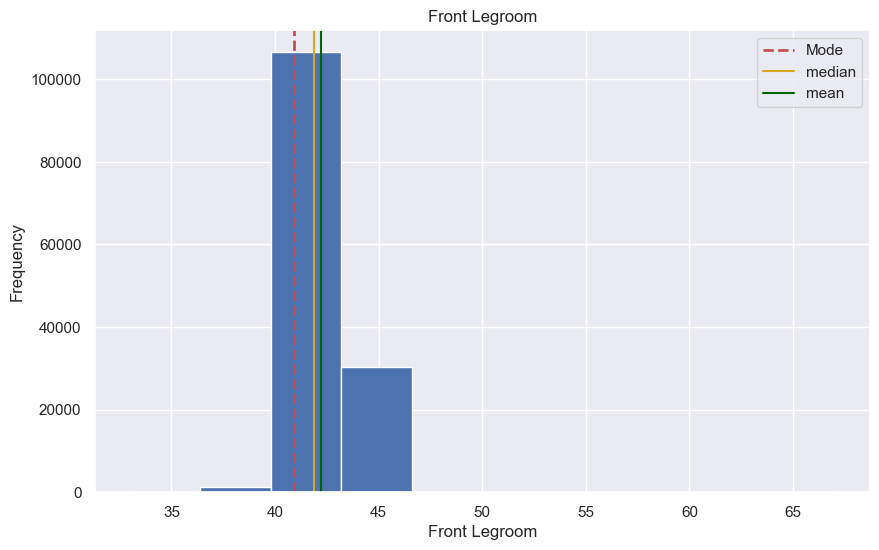

In [69]:
# plotting the distribution of the column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['front_legroom'], bins=10)
plt.title("Front Legroom")
# Add the mode
plt.axvline(cars_df2['front_legroom'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['front_legroom'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['front_legroom'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Front Legroom')
plt.ylabel('Frequency')
plt.show()

In [70]:
# filling the null values with the mean of the column
cars_df2['front_legroom'].fillna(cars_df2['front_legroom'].mean(), inplace=True)

# checking the result
result = cars_df2['front_legroom'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the front_legroom column are {result.round(2)}%.")

The amount of null values in the front_legroom column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/1850103780.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['front_legroom'].fillna(cars_df2['front_legroom'].mean(), inplace=True)


In [71]:
# combining the front_legroom and back_legroom columns
cars_df2['legroom'] = cars_df2['front_legroom'] + cars_df2['back_legroom']

# dropping the front_legroom and back_legroom columns
cars_df2 = cars_df2.drop(['front_legroom', 'back_legroom'], axis=1)

# checking the results
cars_df2.head()

,body_type,city,daysonmarket,dealer_zip,engine_type,exterior_color,franchise_dealer,fuel_tank_volume,fuel_type,height,...,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,combined_fuel_economy,legroom
vin,,,,,,,,,,,,,,,,,,,,,
1G6DX5RK3L0126388,Sedan,Bay Shore,195,11706,I4,Other Color,True,17.4 gal,Gasoline,57.2 in,...,Automatic,t87865,Luxury Sedan AWD,AWD,All-Wheel Drive,116 in,80.3 in,2020,26.000,80.300
W1Y4EBHY8LT026515,Van,Paramus,66,7652,V6 Diesel,Silver,True,24.5 gal,Diesel,96.3 in,...,Automatic,t93032,2500 144 V6 Standard Roof Cargo Van RWD,4X2,4X2,144.3 in,92.3 in,2020,26.115,76.867
5UXTY9C04M9D96295,SUV / Crossover,Bridgeport,18,6606,NaN,Black,True,NaN,NaN,NaN,...,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,2021,26.115,80.164
3VWD17AJ3FM302075,Sedan,Huntington,12,11743,I4,White,True,14.5 gal,Gasoline,57.2 in,...,Automatic,t56177,SE,FWD,Front-Wheel Drive,104.4 in,70 in,2015,31.000,79.300
5FNYF8H5XLB016437,SUV / Crossover,Cambridge,20,2138,V6,Blue,True,19.5 gal,Gasoline,72.2 in,...,9-Speed Automatic,t90156,EX-L AWD,AWD,All-Wheel Drive,111 in,78.6 in,2020,21.500,80.500


In [72]:
# checking how many null values are in the column
percentage = cars_df2['fuel_tank_volume'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the fuel_tank_volume column are {percentage.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 5.4%.


In [73]:
# checking the value counts of the column.
cars_df2['fuel_tank_volume'].value_counts()/cars_df2.shape[0]*100

fuel_tank_volume
26 gal     6.804
13.2 gal   5.421
14 gal     4.797
18.5 gal   4.738
14.5 gal   3.291
            ... 
10.3 gal   0.001
21.2 gal   0.001
25.3 gal   0.001
13.3 gal   0.001
23.9 gal   0.001
Name: count, Length: 166, dtype: float64

In [74]:
# filtering the rows that the fuel_type column is "Electric", with the fuel_tank_volume column.
cars_df2.loc[(cars_df2['fuel_type'] == "Electric"), ['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
vin,,
1G1FY6S00L4137514,NaN,Electric
WBY7Z6C57JVB96698,NaN,Electric
KM8K33AG3LU065589,--,Electric
KMHC75LHXKU044733,NaN,Electric
KNDCC3LG8L5047542,NaN,Electric
...,...,...
WVWPR7AU0KW913033,NaN,Electric
1G1FZ6S0XL4134875,NaN,Electric
1G1FW6S00H4130608,NaN,Electric


In [75]:
# splitting the column and returning the first value
cars_df2['fuel_tank_volume'] = cars_df2['fuel_tank_volume'].str.split(' ').str[0]

# replacing "--" with np.nan
cars_df2['fuel_tank_volume'].replace("--", np.nan , inplace=True)

# converting the fuel_tank_volume column to a float
cars_df2['fuel_tank_volume'] = pd.to_numeric(cars_df2['fuel_tank_volume'], downcast='float')

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/2171020072.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['fuel_tank_volume'].replace("--", np.nan , inplace=True)


In [76]:
# filling the null values with the 0 value on electric cars only.
cars_df2.loc[(cars_df2['fuel_type'] == "Electric"), 'fuel_tank_volume'] = 0

# checking the result
result = cars_df2['fuel_tank_volume'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the fuel_tank_volume column are {result.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 4.91%.


In [77]:
# checking the null values rows
cars_df2[cars_df2['fuel_tank_volume'].isna()][['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
vin,,
5UXTY9C04M9D96295,NaN,NaN
1FTEW1EP5LFC65613,NaN,Gasoline
WA1EVAF1XMD002361,NaN,NaN
1FTYR14U72TA02146,NaN,Gasoline
1FTBR1C89LKB28686,NaN,Flex Fuel Vehicle
...,...,...
4S4WMALD2M3404176,NaN,NaN
W1W4ECHY3LT025612,NaN,Diesel
JTJAM7BX5M5268303,NaN,NaN


In [78]:
# filling the null values with the mean based on the fuel_type column.
cars_df2['fuel_tank_volume'].fillna(cars_df2.groupby('fuel_type')['fuel_tank_volume'].transform('mean'), inplace=True)

# checking the result
result = cars_df2['fuel_tank_volume'].isna().sum()/cars_df2.shape[0]*100
 
print(f"The amount of null values in the fuel_tank_volume column are {result.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 1.69%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/2795508627.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['fuel_tank_volume'].fillna(cars_df2.groupby('fuel_type')['fuel_tank_volume'].transform('mean'), inplace=True)


In [79]:
# checking the null values rows
cars_df2[cars_df2['fuel_tank_volume'].isna()][['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
vin,,
5UXTY9C04M9D96295,NaN,NaN
WA1EVAF1XMD002361,NaN,NaN
5UXCY8C00M9E09392,NaN,NaN
WBXJG9C08M5S22541,NaN,NaN
5UXTY5C01M9D80063,NaN,NaN
...,...,...
WBSJF0C09LCD12654,NaN,NaN
3MZBPADL4MM200328,NaN,NaN
1C6RR7TT4KS707743,NaN,NaN


In [80]:
# checking how many null values are in the column
percent = cars_df2['fuel_type'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the fuel_type column are {percent.round(2)}%.")

The amount of null values in the fuel_type column are 2.77%.


In [81]:

# checking the value counts of the column.
cars_df2['fuel_type'].value_counts()/cars_df2.shape[0]*100


fuel_type
Gasoline                 86.458
Flex Fuel Vehicle         5.282
Hybrid                    2.576
Diesel                    1.502
Biodiesel                 0.865
Electric                  0.538
Compressed Natural Gas    0.007
Name: count, dtype: float64

In [82]:
# checking the null values rows
cars_df2[cars_df2['fuel_type'].isna()][['fuel_type','fuel_tank_volume','engine_type','make_name','model_name']]

,fuel_type,fuel_tank_volume,engine_type,make_name,model_name
vin,,,,,
5UXTY9C04M9D96295,NaN,NaN,NaN,BMW,X3
WA1EVAF1XMD002361,NaN,NaN,NaN,Audi,Q8
5UXCY8C00M9E09392,NaN,NaN,NaN,BMW,X6
1YVHZ8BH7A5M10352,NaN,18.500,NaN,Mazda,MAZDA6
WBXJG9C08M5S22541,NaN,NaN,NaN,BMW,X1
...,...,...,...,...,...
1C6RR7TT4KS707743,NaN,NaN,NaN,RAM,1500
1C4HJXDN9KW576457,NaN,21.500,NaN,Jeep,Wrangler Unlimited
4S4WMALD2M3404176,NaN,NaN,NaN,Subaru,Ascent


In [83]:
# filling the null values with "Gasoline".
cars_df2['fuel_type'].fillna("Gasoline", inplace=True)

# checking the result
percentage = cars_df2['fuel_type'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the fuel_type column are {percentage.round(2)}%.")

The amount of null values in the fuel_type column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/2654677079.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['fuel_type'].fillna("Gasoline", inplace=True)


In [84]:
# checking the null values rows in the fuel_tank_volume column
cars_df2[cars_df2['fuel_tank_volume'].isna()][['fuel_tank_volume','fuel_type']]

,fuel_tank_volume,fuel_type
vin,,
5UXTY9C04M9D96295,NaN,Gasoline
WA1EVAF1XMD002361,NaN,Gasoline
5UXCY8C00M9E09392,NaN,Gasoline
WBXJG9C08M5S22541,NaN,Gasoline
5UXTY5C01M9D80063,NaN,Gasoline
...,...,...
WBSJF0C09LCD12654,NaN,Gasoline
3MZBPADL4MM200328,NaN,Gasoline
1C6RR7TT4KS707743,NaN,Gasoline


In [85]:
# filling the null values with the mean based on the fuel_tank_volume column.
cars_df2['fuel_tank_volume'].fillna(cars_df2.groupby('fuel_type')['fuel_tank_volume'].transform('mean'), inplace=True)

# checking the result
percentage = cars_df2['fuel_tank_volume'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the fuel_tank_volume column are {percentage.round(2)}%.")

The amount of null values in the fuel_tank_volume column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/2512193425.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['fuel_tank_volume'].fillna(cars_df2.groupby('fuel_type')['fuel_tank_volume'].transform('mean'), inplace=True)


In [86]:
percentage = cars_df2['engine_type'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the engine_type column are {percentage.round(2)}%.")

The amount of null values in the engine_type column are 3.36%.


In [87]:
# checking the unique values in the engine_type column
cars_df2['engine_type'].unique()

array(['I4', 'V6 Diesel', nan, 'V6', 'V8', 'V6 Flex Fuel Vehicle', 'I3',
       'I6', 'I4 Diesel', 'H4', 'I4 Hybrid', 'V6 Hybrid', 'V8 Biodiesel',
       'I4 Flex Fuel Vehicle', 'V8 Flex Fuel Vehicle', 'V8 Diesel', 'H6',
       'V6 Biodiesel', 'W12', 'V10', 'I5', 'I6 Diesel',
       'W12 Flex Fuel Vehicle', 'V12', 'H4 Hybrid', 'I2', 'V8 Hybrid',
       'I5 Biodiesel', 'V8 Compressed Natural Gas', 'I5 Diesel',
       'I4 Compressed Natural Gas', 'R2', 'I6 Hybrid'], dtype=object)

In [88]:
# checking the value counts of the column.
cars_df2['engine_type'].value_counts()/cars_df2.shape[0]*100

engine_type
I4                          47.320
V6                          24.455
V8                           9.321
V8 Flex Fuel Vehicle         2.645
I4 Hybrid                    2.463
V6 Flex Fuel Vehicle         2.322
H4                           2.198
I3                           1.780
I6                           0.917
I6 Diesel                    0.785
V8 Biodiesel                 0.740
I4 Flex Fuel Vehicle         0.312
I4 Diesel                    0.250
V6 Diesel                    0.239
V8 Diesel                    0.198
H6                           0.168
I5                           0.167
V6 Biodiesel                 0.121
V6 Hybrid                    0.103
V12                          0.039
I2                           0.029
V10                          0.027
W12                          0.015
H4 Hybrid                    0.005
V8 Hybrid                    0.004
I5 Biodiesel                 0.004
V8 Compressed Natural Gas    0.004
I4 Compressed Natural Gas    0.003
W12 Flex

In [89]:
# selecting the first string in the engine_type column
cars_df2['engine_type'] = cars_df2['engine_type'].str.split(' ').str[0]

# checking the unique values in the engine_type column
cars_df2['engine_type'].unique()

array(['I4', 'V6', nan, 'V8', 'I3', 'I6', 'H4', 'H6', 'W12', 'V10', 'I5',
       'V12', 'I2', 'R2'], dtype=object)

In [90]:
# looking at the null rows
cars_df2.loc[cars_df2['engine_type'].isna(),['make_name','model_name','engine_type', 'fuel_type']]

,make_name,model_name,engine_type,fuel_type
vin,,,,
5UXTY9C04M9D96295,BMW,X3,NaN,Gasoline
WA1EVAF1XMD002361,Audi,Q8,NaN,Gasoline
1G1FY6S00L4137514,Chevrolet,Bolt EV,NaN,Electric
WBY7Z6C57JVB96698,BMW,i3,NaN,Electric
5UXCY8C00M9E09392,BMW,X6,NaN,Gasoline
...,...,...,...,...
1G1FW6S00H4130608,Chevrolet,Bolt EV,NaN,Electric
JTJAM7BX5M5268303,Lexus,GX,NaN,Gasoline
5YJSA1E26JF281584,Tesla,Model S,NaN,Electric


In [91]:
# looking at the null rows that the fuel_type column is "Electric"
cars_df2.loc[(cars_df2['engine_type'].isna()) & (cars_df2['fuel_type'] == "Electric"),['make_name','model_name','engine_type', 'fuel_type']]

,make_name,model_name,engine_type,fuel_type
vin,,,,
1G1FY6S00L4137514,Chevrolet,Bolt EV,NaN,Electric
WBY7Z6C57JVB96698,BMW,i3,NaN,Electric
KM8K33AG3LU065589,Hyundai,Kona Electric,NaN,Electric
KMHC75LHXKU044733,Hyundai,Ioniq Electric,NaN,Electric
KNDCC3LG8L5047542,Kia,Niro EV,NaN,Electric
...,...,...,...,...
WVWPR7AU0KW913033,Volkswagen,e-Golf,NaN,Electric
1G1FZ6S0XL4134875,Chevrolet,Bolt EV,NaN,Electric
1G1FW6S00H4130608,Chevrolet,Bolt EV,NaN,Electric


In [92]:
# filling the null values with the fuel_type "Electric" with the "Electric Motor" value.
cars_df2.loc[(cars_df2['engine_type'].isna()) & (cars_df2['fuel_type'] == "Electric"), 'engine_type'] = "Electric Motor"

In [93]:
# filling the null values with the fuel_type "Gasoline" with the "I4" value.
cars_df2.loc[(cars_df2['engine_type'].isna()) & (cars_df2['fuel_type'] == "Gasoline"), 'engine_type'] = "Gasoline engine"

In [94]:
# checking for nulls
result = cars_df2['engine_type'].isna().sum()/cars_df2.shape[0]*100
 
print(f"The amount of null values in the engine_type column are {result}%.")

The amount of null values in the engine_type column are 0.027930867696248408%.


In [95]:
# checking the null values rows in the engine_type column
cars_df2[cars_df2['engine_type'].isna()][['engine_type','fuel_type']]

,engine_type,fuel_type
vin,,
1FDUF5HT3KDA21413,NaN,Diesel
1FD0X5HT2KEF04445,NaN,Diesel
1FDUF5HT6KEG79317,NaN,Diesel
1FDUF5HTXKDA27323,NaN,Diesel
1FD0X5HT8KEF89744,NaN,Diesel
1FDUF5HT9KDA01439,NaN,Diesel
1FD0X5HT0KEG62217,NaN,Diesel
1FDUF5HT7KDA17171,NaN,Diesel
3C7WRNAL1KG577756,NaN,Diesel


In [96]:
# filling the null values with the fuel_type "Diesel" with the "Diesel" value.
cars_df2.loc[(cars_df2['engine_type'].isna()) & (cars_df2['fuel_type'] == "Diesel"), 'engine_type'] = "Diesel engine"

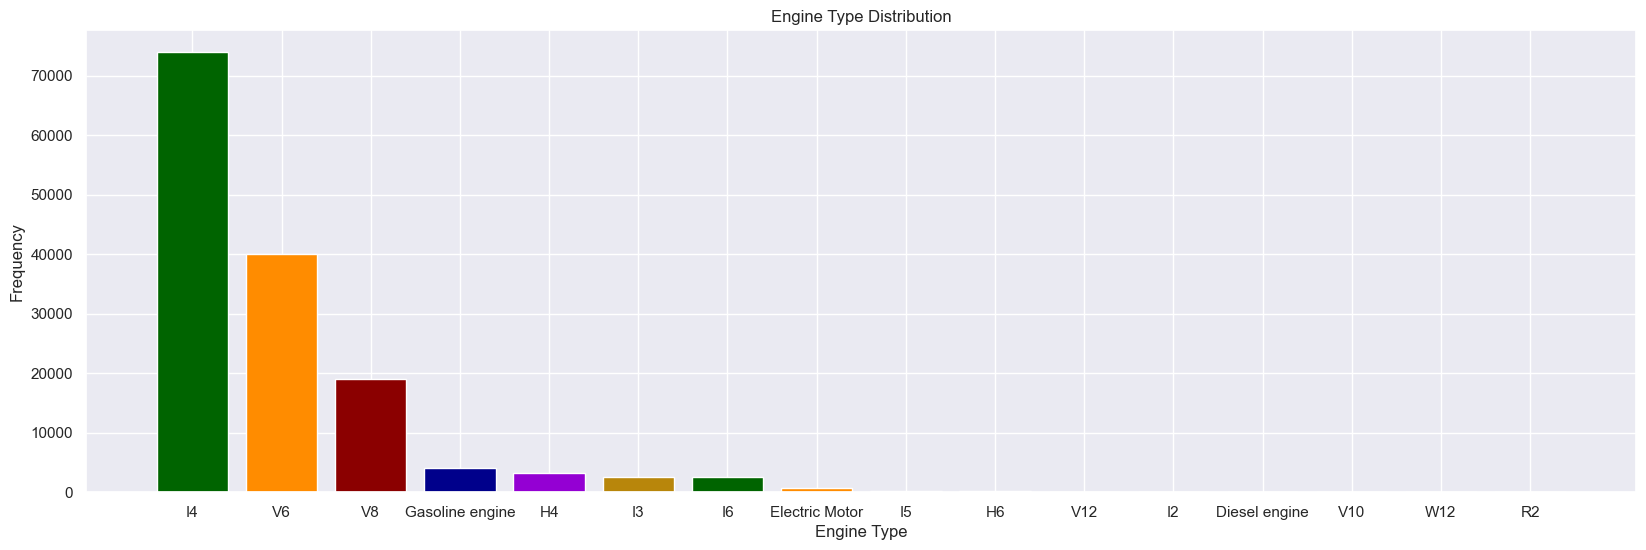

In [97]:
# plotting the distribution of the engine_type column
plt.figure(figsize=(20,6))
plt.bar(cars_df2['engine_type'].value_counts().index, cars_df2['engine_type'].value_counts(),
        color=['darkgreen','darkorange','darkred','darkblue','darkviolet','darkgoldenrod'])
plt.title('Engine Type Distribution')
plt.xlabel('Engine Type')
plt.ylabel('Frequency')
plt.show()

In [98]:
# checking how many null values are in the column
percent = cars_df2['height'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the height column are {percent.round(2)}%.")

The amount of null values in the height column are 5.4%.


In [99]:
# checking the value counts of the column.
cars_df2['height'].value_counts()/cars_df2.shape[0]*100

height
66.1 in    2.828
66.3 in    2.666
56.9 in    2.437
56.5 in    2.431
65.4 in    2.294
            ... 
110.2 in   0.001
47.5 in    0.001
47.4 in    0.001
48 in      0.001
110.5 in   0.001
Name: count, Length: 430, dtype: float64

In [100]:
# checking the unique values in the column
cars_df2['height'].unique()

array(['57.2 in', '96.3 in', nan, '72.2 in', '57 in', '66.3 in',
       '77.6 in', '67.8 in', '57.1 in', '70.2 in', '57.4 in', '69 in',
       '67.1 in', '69.9 in', '56.8 in', '66.1 in', '65 in', '68.3 in',
       '65.4 in', '66 in', '70.7 in', '64.8 in', '64.2 in', '58.5 in',
       '67 in', '65.2 in', '67.7 in', '74.4 in', '58.2 in', '56.5 in',
       '69.3 in', '74.9 in', '58.1 in', '63.3 in', '60.7 in', '70.4 in',
       '59 in', '63 in', '57.7 in', '57.8 in', '66.7 in', '63.9 in',
       '56.3 in', '65.9 in', '56.9 in', '57.5 in', '70.1 in', '66.5 in',
       '56.6 in', '69.4 in', '57.9 in', '64.1 in', '69.8 in', '56.1 in',
       '71.6 in', '71.1 in', '57.6 in', '77.2 in', '70.6 in', '58 in',
       '67.5 in', '54.8 in', '55.7 in', '71 in', '65.7 in', '61.6 in',
       '81 in', '68.4 in', '58.3 in', '63.5 in', '77.7 in', '70.9 in',
       '107 in', '54.9 in', '73 in', '68.1 in', '66.6 in', '55.5 in',
       '75.8 in', '75.5 in', '57.3 in', '74 in', '68.5 in', '59.6 in',
       '7

In [101]:
# splitting the column and returning the first value
cars_df2['height'] = cars_df2['height'].str.split(' ').str[0]

# replacing "--" with np.nan
cars_df2['height'].replace("--", np.nan , inplace=True)

# converting the height column to a float
cars_df2['height'] = pd.to_numeric(cars_df2['height'], downcast='float')

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/2867963313.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['height'].replace("--", np.nan , inplace=True)


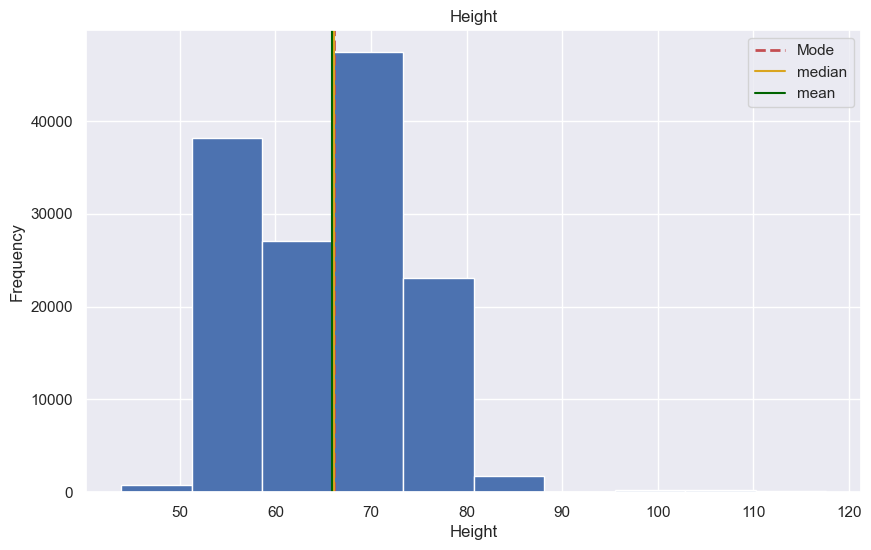

In [102]:

plt.figure(figsize=(10,6))
plt.hist(cars_df2['height'], bins=10)
plt.title("Height")
# Add the mode
plt.axvline(cars_df2['height'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['height'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['height'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [103]:
# filling the null values with the mean of the column
cars_df2['height'].fillna(cars_df2['height'].mean(), inplace=True)

# checking the result
result = cars_df2['height'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the height column are {result.round(2)}%.")

The amount of null values in the height column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/2318083519.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['height'].fillna(cars_df2['height'].mean(), inplace=True)


In [104]:
# checking how many null values are in the column
percentage = cars_df2['horsepower'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the horsepower column are {percentage.round(2)}%.")

The amount of null values in the horsepower column are 5.84%.


In [105]:
# checking the value counts of the column.
cars_df2['horsepower'].value_counts()/cars_df2.shape[0]*100

horsepower
170.000   3.962
375.000   2.617
395.000   2.536
310.000   2.415
180.000   2.367
           ... 
731.000   0.001
313.000   0.001
670.000   0.001
344.000   0.001
229.000   0.001
Name: count, Length: 400, dtype: float64

In [106]:
# filling the null values with the most common value
cars_df2['horsepower'].fillna(cars_df2['horsepower'].mode()[0], inplace=True)

# checking the result
percentage = cars_df2['horsepower'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the horsepower column are {percentage.round(2)}%.")

The amount of null values in the horsepower column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/3458288737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['horsepower'].fillna(cars_df2['horsepower'].mode()[0], inplace=True)


In [107]:
# checking how many null values are in the column
percentage = cars_df2['interior_color'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the interior_color column are {percentage.round(2)}%.")

The amount of null values in the interior_color column are 12.66%.


In [108]:
# checking the value counts of the column.
cars_df2['interior_color'].value_counts()/cars_df2.shape[0]*100

interior_color
Black                                                29.201
Gray                                                  6.530
Jet Black                                             6.184
Black (Ebony)                                         4.829
Black (Charcoal)                                      3.679
                                                      ...  
Chestnut Brown/Ebony Accents w/Perforated Leather-    0.001
BLACK/KCSW                                            0.001
Gbu                                                   0.001
NH-829                                                0.001
LF24/BLACK W/ HADORI ALUMINUM                         0.001
Name: count, Length: 8270, dtype: float64

In [109]:
# filling the null values with the most frequent value
cars_df2['interior_color'].fillna("Black", inplace=True)

# checking the result
result = cars_df2['interior_color'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the interior_color column are {result.round(2)}%.")

The amount of null values in the interior_color column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/1318165703.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['interior_color'].fillna("Black", inplace=True)


In [110]:
# Adding a new column based on the list of primary colors.
colors = ['White', 'Black', 'Gray', 'Silver', 
          'Red', 'Blue', 'Brown', 'Green', 
          'Beige', 'Orange', 'Gold', 'Yellow', 'Purple']

cars_df2['interior_color'] = cars_df2['interior_color'].str.findall('|'.join(colors)).apply(set).str.join(', ')

In [111]:
# checking the result
cars_df2['interior_color'].value_counts()

interior_color
Black                   95644
Gray                    18408
                        12823
White                    4472
Brown                    3677
Beige, Brown             3322
Gray, Black              2216
Red                      1623
Silver                   1224
Blue                     1098
Red, Black                577
Beige, Brown, Black       504
Brown, Black              309
Beige, Black              115
Green                     105
Blue, Black               103
Silver, Black              94
Gold                       66
White, Black               56
Yellow, Beige              52
Orange                     51
Orange, Black              31
Gray, Brown                26
Gray, Blue                 23
Gold, Black                19
Gray, Beige, Brown         14
Red, Brown                 14
Gray, White                13
Red, Brown, Black          11
Gray, Silver               10
Yellow                      9
Purple                      7
Red, White               

In [112]:
# replacing null values with 'Other Color'.
cars_df2['interior_color'].replace("", "Other Color", inplace=True)

# masking the colors that are Mixed Colors.
mask = cars_df2['interior_color'].map(cars_df2['interior_color'].value_counts()) < 29
mask2 = cars_df2['interior_color'].map(cars_df2['interior_color'].value_counts()).between(30, 110) 
mask3 = cars_df2['interior_color'].map(cars_df2['interior_color'].value_counts()).between(186, 1091)
mask4 = cars_df2['interior_color'].map(cars_df2['interior_color'].value_counts()).between(2121, 12064)

# converting the masked colors to Mixed Colors.
cars_df2['interior_color'] =  cars_df2['interior_color'].mask(mask, 'Mixed Colors')
cars_df2['interior_color'] =  cars_df2['interior_color'].mask(mask2, 'Mixed Colors')
cars_df2['interior_color'] =  cars_df2['interior_color'].mask(mask3, 'Mixed Colors')
cars_df2['interior_color'] =  cars_df2['interior_color'].mask(mask4, 'Mixed Colors')

# checking the new unique values in the exterior_color_new column
cars_df2['interior_color'].value_counts()/cars_df2.shape[0]*100

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/1788535781.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['interior_color'].replace("", "Other Color", inplace=True)


interior_color
Black          65.157
Gray           12.540
Mixed Colors   10.802
Other Color     8.736
Red             1.106
Silver          0.834
Blue            0.748
Beige, Black    0.078
Name: count, dtype: float64

In [113]:
# replacing all rows with more than one color with 'Mixed Colors'.
cars_df2['interior_color'].replace(["Brown, Beige","Gray, Black","Black, White"],"Mixed Colors", inplace=True)

# checking the new unique values in the exterior_color_new column
cars_df2['interior_color'].value_counts()/cars_df2.shape[0]*100

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/1967631323.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['interior_color'].replace(["Brown, Beige","Gray, Black","Black, White"],"Mixed Colors", inplace=True)


interior_color
Black          65.157
Gray           12.540
Mixed Colors   10.802
Other Color     8.736
Red             1.106
Silver          0.834
Blue            0.748
Beige, Black    0.078
Name: count, dtype: float64

In [114]:
# checking how many null values are in the column
percentage = cars_df2['length'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the length column are {percentage.round(2)}%.")

The amount of null values in the length column are 5.4%.


In [115]:
# checking the value counts of the column.
cars_df2['length'].value_counts()/cars_df2.shape[0]*100

length
231.9 in   3.239
183.1 in   2.136
231.7 in   1.955
182.3 in   1.864
182.1 in   1.736
            ... 
219 in     0.001
202.3 in   0.001
162.6 in   0.001
204.2 in   0.001
256.1 in   0.001
Name: count, Length: 739, dtype: float64

In [116]:
# checking the unique values in the column
cars_df2['length'].unique()

array(['193.8 in', '233.5 in', nan, '183.3 in', '190.5 in', '191.5 in',
       '187.8 in', '232.9 in', '195.5 in', '192.2 in', '197.2 in',
       '183.7 in', '203.7 in', '181.1 in', '204.3 in', '194.4 in',
       '180.5 in', '176.4 in', '181.9 in', '188.8 in', '183.1 in',
       '193.6 in', '197.5 in', '171.5 in', '169.1 in', '198.4 in',
       '191.4 in', '192.5 in', '204 in', '206.6 in', '182.3 in',
       '185.1 in', '189.8 in', '191.6 in', '178.7 in', '191.7 in',
       '172.4 in', '202.9 in', '194.5 in', '163 in', '179.1 in', '168 in',
       '193.4 in', '184.9 in', '194.6 in', '198.8 in', '190.7 in',
       '193.1 in', '195.7 in', '187.4 in', '192.1 in', '182.8 in',
       '180 in', '200 in', '158 in', '194.2 in', '182.1 in', '196.8 in',
       '184.5 in', '210.8 in', '193.2 in', '231.9 in', '212.7 in',
       '184.2 in', '192.8 in', '190.3 in', '193.7 in', '179.5 in',
       '177.4 in', '167.6 in', '182.2 in', '198.3 in', '173 in', '182 in',
       '194.9 in', '192.4 in', '164 i

In [117]:
# splitting the column and returning the first value
cars_df2['length'] = cars_df2['length'].str.split(' ').str[0]

# replacing "--" with np.nan
cars_df2['length'].replace("--", np.nan , inplace=True)

# converting the length column to a float
cars_df2['length'] = pd.to_numeric(cars_df2['length'], downcast='float')

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/1850488406.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['length'].replace("--", np.nan , inplace=True)


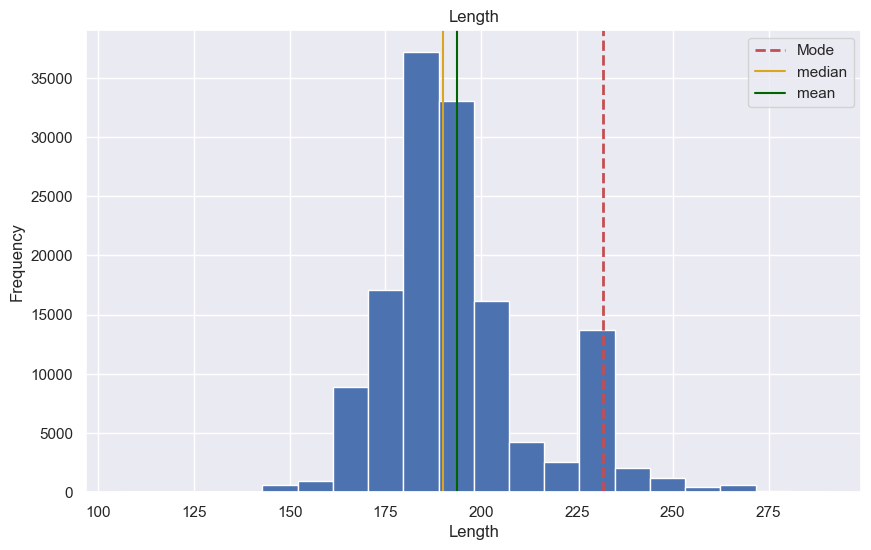

In [118]:
# plotting the distribution of the length column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['length'], bins=20)
plt.title('Length')
# Add the mode
plt.axvline(cars_df2['length'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['length'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['length'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [119]:
# filling the null values with the median of the column
cars_df2['length'].fillna(cars_df2['length'].median(), inplace=True)

# checking the result
result = cars_df2['length'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the length column are {result.round(2)}%.")

The amount of null values in the length column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/3885645842.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['length'].fillna(cars_df2['length'].median(), inplace=True)


In [120]:
# dropping the column
cars_df2.drop('main_picture_url', axis=1, inplace=True)

In [121]:
# checking how many null values are in the column
percentage = cars_df2['major_options'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the major_options column are {percentage.round(2)}%.")

The amount of null values in the major_options column are 6.8%.


In [122]:
# checking the value counts
cars_df2['major_options'].value_counts()/cars_df2.shape[0]*100

major_options
['Alloy Wheels', 'Bluetooth', 'Backup Camera']                                                                                                                                            2.952
['Alloy Wheels']                                                                                                                                                                          1.383
['Steel Wheels']                                                                                                                                                                          1.326
['Bluetooth', 'Backup Camera']                                                                                                                                                            1.270
['Steel Wheels', 'Bluetooth', 'Backup Camera']                                                                                                                                            1.224
                          

In [123]:
# creating a major_options_count column to count the number of major options
cars_df2['major_options_count'] = cars_df2['major_options'].str.count(',') + 1
 
# checking the result
cars_df2['major_options_count'].value_counts()

major_options_count
4.000     17011
3.000     15180
5.000     14768
6.000     13749
7.000     12329
8.000     11020
2.000     10959
1.000      9069
9.000      8917
10.000     7408
11.000     5613
12.000     3917
13.000     2413
14.000     1646
15.000      918
16.000      623
17.000      395
18.000      230
19.000      154
20.000      134
21.000       90
22.000       57
23.000       54
24.000       46
25.000       29
26.000       27
27.000       17
29.000       10
28.000        9
31.000        7
32.000        5
30.000        3
33.000        3
38.000        2
45.000        1
40.000        1
Name: count, dtype: int64

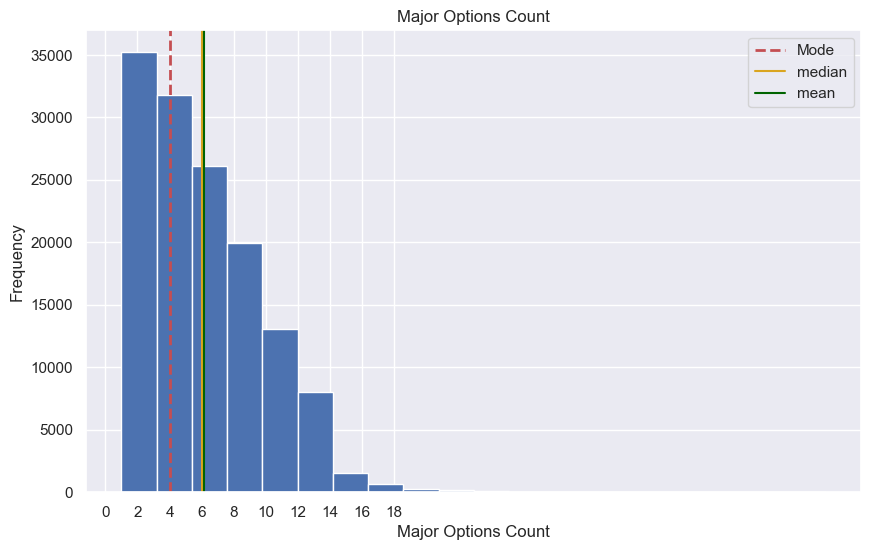

In [124]:
# plotting the distribution of the major_options_count column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['major_options_count'], bins=20)
plt.title('Major Options Count')
# Add the mode
plt.axvline(cars_df2['major_options_count'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['major_options_count'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['major_options_count'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Major Options Count')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 20, 2))
plt.show()

In [125]:
# filling the null values with the mean of the column
cars_df2['major_options_count'].fillna(cars_df2['major_options_count'].mean(), inplace=True)
 
# checking the result
result = cars_df2['major_options_count'].isna().sum()/cars_df2.shape[0]*100
 
print(f"The amount of null values in the major_options_count column are {result.round(2)}%.")

The amount of null values in the major_options_count column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/554953928.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['major_options_count'].fillna(cars_df2['major_options_count'].mean(), inplace=True)


In [126]:
# dropping the major_options column
cars_df2.drop('major_options', axis=1, inplace=True)

In [127]:
# checking how many null values are in the column
percentage = cars_df2['maximum_seating'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the maximum_seating column are {percentage.round(2)}%.")

The amount of null values in the maximum_seating column are 5.4%.


In [128]:
# checking the value_counts of the column
cars_df2['maximum_seating'].value_counts()/cars_df2.shape[0]*100

maximum_seating
5 seats    62.387
7 seats    10.181
6 seats    10.135
8 seats     6.575
4 seats     2.696
2 seats     1.180
3 seats     1.018
15 seats    0.210
9 seats     0.129
12 seats    0.062
--          0.017
10 seats    0.014
Name: count, dtype: float64

In [129]:
# checking the unique values of the column
cars_df2['maximum_seating'].unique()

array(['5 seats', '3 seats', nan, '6 seats', '7 seats', '8 seats',
       '4 seats', '2 seats', '12 seats', '15 seats', '9 seats', '--',
       '10 seats'], dtype=object)

In [130]:
# replacing the "--" with np.nan
cars_df2['maximum_seating'].replace("--", np.nan , inplace=True)

# filling the null values with a new value called the most frequent value.
cars_df2['maximum_seating'].fillna("5 seats", inplace=True)

# checking the result
result = cars_df2['maximum_seating'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the maximum_seating column are {result.round(2)}%.")

The amount of null values in the maximum_seating column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/1858282596.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['maximum_seating'].replace("--", np.nan , inplace=True)
/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/1858282596.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [131]:
# removing the " seats" from the column
cars_df2['maximum_seating'] = cars_df2['maximum_seating'].str.replace(" seats", "")

# converting the column to a int
cars_df2['maximum_seating'] = pd.to_numeric(cars_df2['maximum_seating'], downcast='integer')

# checking the result
cars_df2['maximum_seating'].value_counts()

maximum_seating
5     99524
7     14945
6     14878
8      9651
4      3958
2      1732
3      1495
15      308
9       189
12       91
10       20
Name: count, dtype: int64

In [132]:
# checking how many null values are in the column
percentage = cars_df2['mileage'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the mileage column are {percentage.round(2)}%.")

The amount of null values in the mileage column are 4.9%.


In [133]:
# checking the value counts
cars_df2['mileage'].value_counts()/cars_df2.shape[0]*100

mileage
0.000        8.632
5.000        5.099
10.000       4.668
3.000        2.615
2.000        2.496
              ... 
143350.000   0.001
72215.000    0.001
77044.000    0.001
31043.000    0.001
62138.000    0.001
Name: count, Length: 55642, dtype: float64

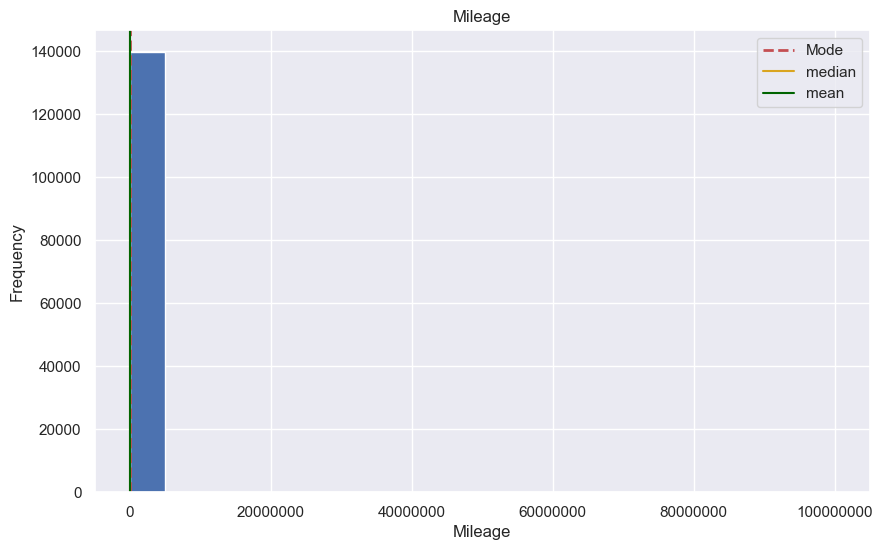

In [134]:
# plotting the mileage column to see the distribution
plt.figure(figsize=(10,6))
plt.hist(cars_df2['mileage'], bins=20)
plt.title('Mileage')
# Add the mode
plt.axvline(cars_df2['mileage'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['mileage'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['mileage'].mean(), color='darkgreen', label='mean')
#removing scientific notation
plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

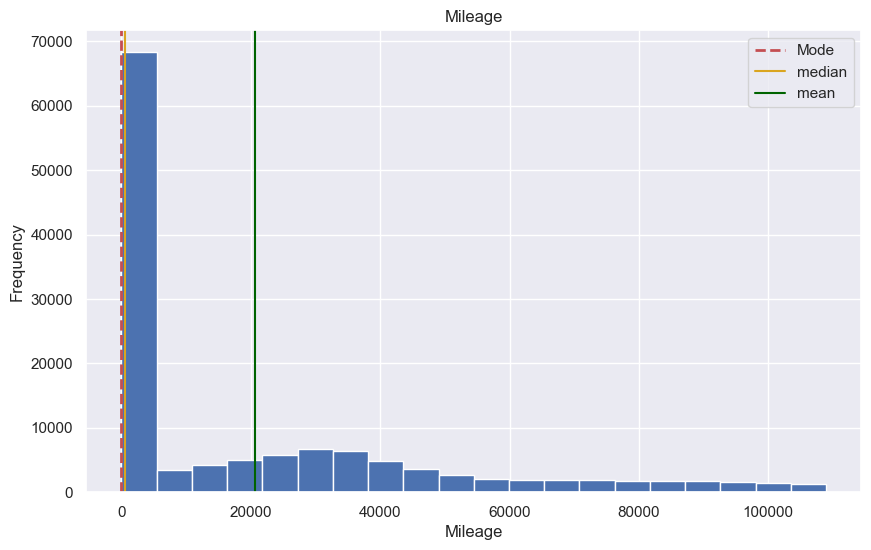

In [135]:
# using the interquartile range to remove outliers
q1 = cars_df2['mileage'].quantile(0.25)
q3 = cars_df2['mileage'].quantile(0.75)

# calculating the interquartile range
iqr = q3 - q1

# removing outliers
cars_df2 = cars_df2[(cars_df2['mileage'] >= q1 - 1.5*iqr) & (cars_df2['mileage'] <= q3 + 1.5*iqr)]

# checking the result
plt.figure(figsize=(10,6))
plt.hist(cars_df2['mileage'], bins=20)
plt.title('Mileage')
# Add the mode
plt.axvline(cars_df2['mileage'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['mileage'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['mileage'].mean(), color='darkgreen', label='mean')
#removing scientific notation
plt.ticklabel_format(style='plain')
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

In [136]:
# filling the null values with the mean of the column
cars_df2['mileage'].fillna(cars_df2['mileage'].mean(), inplace=True)

# checking the result
result = cars_df2['mileage'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the mileage column are {result.round(2)}%.")

The amount of null values in the mileage column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/3756905992.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['mileage'].fillna(cars_df2['mileage'].mean(), inplace=True)


In [137]:
# dropping the column
cars_df2.drop('power', axis=1, inplace=True)

In [138]:
# checking the number of null values in the column
percentage = cars_df2['seller_rating'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the seller_rating column are {percentage.round(2)}%.")

The amount of null values in the seller_rating column are 1.24%.


In [139]:

# checking the value_counts of the column
cars_df2['seller_rating'].value_counts()/cars_df2.shape[0]*100

seller_rating
5.000   5.908
4.000   4.090
4.500   3.598
4.667   2.041
4.333   2.028
         ... 
4.196   0.001
4.347   0.001
4.253   0.001
3.776   0.001
3.062   0.001
Name: count, Length: 1636, dtype: float64

In [140]:
# filling the null values with the most frequent value.
cars_df2['seller_rating'].fillna("5", inplace=True)

# checking the result
result = cars_df2['seller_rating'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the seller_rating column are {result.round(2)}%.")

The amount of null values in the seller_rating column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/3292930533.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['seller_rating'].fillna("5", inplace=True)
/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/3292930533.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cars_df2['seller_rating'].fillna("5", inplace=T

In [141]:
# binning the column into 5 star ratings
cars_df2['seller_rating'] = cars_df2['seller_rating'].astype(int)
cars_df2['seller_rating'] = pd.cut(cars_df2['seller_rating'], bins=[0,1,2,3,4,5], labels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])
 
# checking the result
cars_df2['seller_rating'].value_counts()

seller_rating
4 stars    92343
3 stars    24552
5 stars     9176
2 stars     1845
1 star       369
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

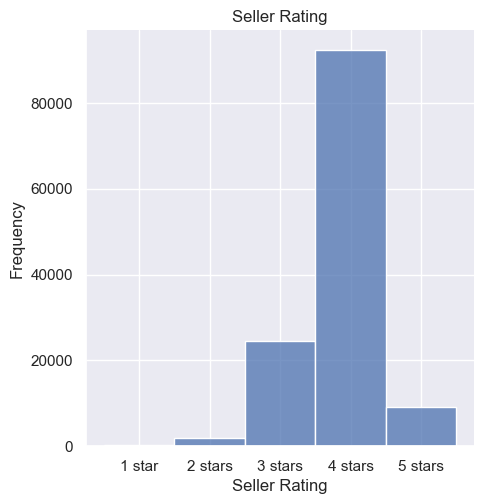

In [142]:
# plotting the column
plt.figure(figsize=(10,6))
sns.displot(cars_df2['seller_rating'], bins=5)
plt.title('Seller Rating')
plt.xlabel('Seller Rating')
plt.ylabel('Frequency')
plt.show()

In [143]:
# dropping the column
cars_df2.drop(['sp_id'], axis=1, inplace=True)

In [144]:
# checking the number of null values in the column
percentage = cars_df2['torque'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the torque column are {percentage.round(2)}%.")

The amount of null values in the torque column are 17.71%.


In [145]:
# checking the value_counts of the column
cars_df2['torque'].value_counts()/cars_df2.shape[0]*100

torque
383 lb-ft @ 4,100 RPM   3.130
400 lb-ft @ 4,500 RPM   2.408
410 lb-ft @ 3,950 RPM   2.029
148 lb-ft @ 200 RPM     2.008
132 lb-ft @ 4,500 RPM   1.884
                         ... 
232 lb-ft @ 3,000 RPM   0.001
270 lb-ft @ 3,200 RPM   0.001
154 lb-ft @ 4,000 RPM   0.001
260 lb-ft @ 1,250 RPM   0.001
487 lb-ft @ 1,950 RPM   0.001
Name: count, Length: 1197, dtype: float64

In [146]:
# splitting the column and returning the first value
cars_df2['torque'] = cars_df2['torque'].str.split(" ").str[0]

# converting the column to float.
cars_df2['torque'] = cars_df2['torque'].astype(float)

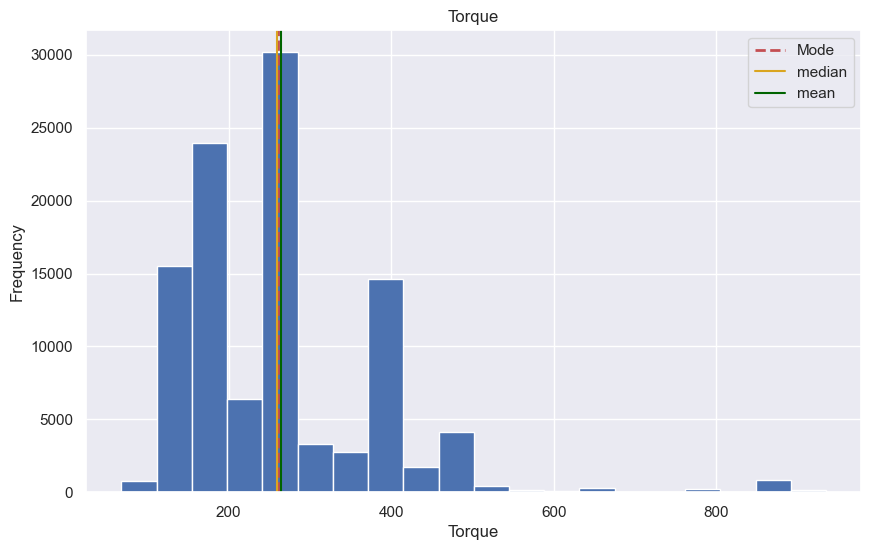

In [147]:
# plotting the distribution of the column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['torque'], bins=20)
plt.title('Torque')
# Add the mode
plt.axvline(cars_df2['torque'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['torque'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['torque'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Torque')
plt.ylabel('Frequency')
plt.show()

In [148]:
# filling the null values with the mean of the column.
cars_df2['torque'].fillna(cars_df2['torque'].mean(), inplace=True)

# checking the result
result = cars_df2['torque'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the torque column are {result.round(2)}%.")

The amount of null values in the torque column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/3311002353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['torque'].fillna(cars_df2['torque'].mean(), inplace=True)


In [149]:
# checking how many null values are in the column
percentage = cars_df2['transmission'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the transmission column are {percentage.round(2)}%.")

The amount of null values in the transmission column are 2.1%.


In [150]:
# checking the value_counts of the column
cars_df2['transmission'].value_counts()/cars_df2.shape[0]*100

transmission
A             80.061
CVT           15.925
M              1.528
Dual Clutch    0.386
Name: count, dtype: float64

In [151]:
# checking for unique values in the column
cars_df2['transmission'].unique()

array(['A', 'CVT', nan, 'Dual Clutch', 'M'], dtype=object)

In [152]:
# filling the null values with "A", for Automatic transmission.
cars_df2['transmission'].fillna("A", inplace=True)

# checking the result
result = cars_df2['transmission'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the transmission column are {result.round(2)}%.")

The amount of null values in the transmission column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/2978603139.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['transmission'].fillna("A", inplace=True)


In [153]:
# dropping the transmission_display
cars_df2.drop(['transmission_display'], axis=1, inplace=True)

In [154]:
# dropping the column
cars_df2.drop(['trimId'], axis=1, inplace=True)

In [155]:
# dropping the column
cars_df2.drop(['trim_name'], axis=1, inplace=True)

In [156]:
# checking the number of null values in the column
percentage = cars_df2['wheel_system'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the wheel_system column are {percentage}%.")

The amount of null values in the wheel_system column are 4.850138363799353%.


In [157]:
# checking the value_counts of the column
cars_df2['wheel_system'].value_counts()/cars_df2.shape[0]*100

wheel_system
FWD   42.429
AWD   23.752
4WD   18.985
RWD    6.106
4X2    3.878
Name: count, dtype: float64

In [158]:
# checking the unique values of the column
cars_df2['wheel_system'].unique()

array(['4X2', nan, 'FWD', 'AWD', '4WD', 'RWD'], dtype=object)

In [159]:
# replacing the null values with "FWD".
cars_df2['wheel_system'].fillna("FWD", inplace=True)

# checking the result
result = cars_df2['wheel_system'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the wheel_system column are {result.round(2)}%.")

The amount of null values in the wheel_system column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/3203034841.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['wheel_system'].fillna("FWD", inplace=True)


In [160]:
cars_df2['wheel_system_display'].value_counts()

wheel_system_display
Front-Wheel Drive    54430
All-Wheel Drive      30470
Four-Wheel Drive     24355
Rear-Wheel Drive      7833
4X2                   4975
Name: count, dtype: int64

In [161]:
# dropping the column
cars_df2.drop(['wheel_system_display'], axis=1, inplace=True)

In [162]:
# checking the number of null values in the column
percentage = cars_df2['wheelbase'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the wheelbase column are {percentage.round(2)}%.")

The amount of null values in the wheelbase column are 5.11%.


In [163]:
# checking the value_counts of the column
cars_df2['wheelbase'].value_counts()/cars_df2.shape[0]*100

wheelbase
106.3 in   6.803
112.2 in   4.416
145 in     3.191
105.1 in   2.967
111.2 in   2.905
            ... 
124 in     0.001
118.8 in   0.001
167.5 in   0.001
178 in     0.001
141 in     0.001
Name: count, Length: 399, dtype: float64

In [164]:
# checking the unique values of the column
cars_df2['wheelbase'].unique()

array(['144.3 in', nan, '104.4 in', '111 in', '109.3 in', '112.5 in',
       '144.6 in', '111.4 in', '114.2 in', '106.3 in', '121.2 in',
       '104.7 in', '114.8 in', '106.7 in', '105.1 in', '112.2 in',
       '107.3 in', '120.2 in', '112.7 in', '109.8 in', '116 in',
       '126.4 in', '114.7 in', '110.4 in', '104.2 in', '112.9 in',
       '108.3 in', '101.2 in', '106.2 in', '103.6 in', '110.5 in',
       '117.1 in', '119.1 in', '110.2 in', '118 in', '109.4 in',
       '111.2 in', '110.6 in', '119 in', '101.1 in', '114.6 in',
       '113.8 in', '111.8 in', '126.8 in', '115.5 in', '145 in',
       '128.3 in', '111.6 in', '103 in', '100.6 in', '116.2 in',
       '112.8 in', '103.8 in', '117.5 in', '102.4 in', '103.5 in',
       '106.8 in', '104.3 in', '115.3 in', '140.5 in', '108.1 in',
       '119.8 in', '170.3 in', '107.1 in', '118.1 in', '99.2 in',
       '106.5 in', '121.1 in', '115.1 in', '147.4 in', '143.5 in',
       '140.6 in', '122.8 in', '109.2 in', '105.5 in', '120.6 in',
   

In [165]:
# splitting the column and returning the first value
cars_df2['wheelbase'] = cars_df2['wheelbase'].str.split(" ").str[0]

# replacing "--" with a null value.
cars_df2['wheelbase'].replace("--", np.nan, inplace=True)

# converting the column to float.
cars_df2['wheelbase'] = cars_df2['wheelbase'].astype(float)

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/2391403237.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['wheelbase'].replace("--", np.nan, inplace=True)


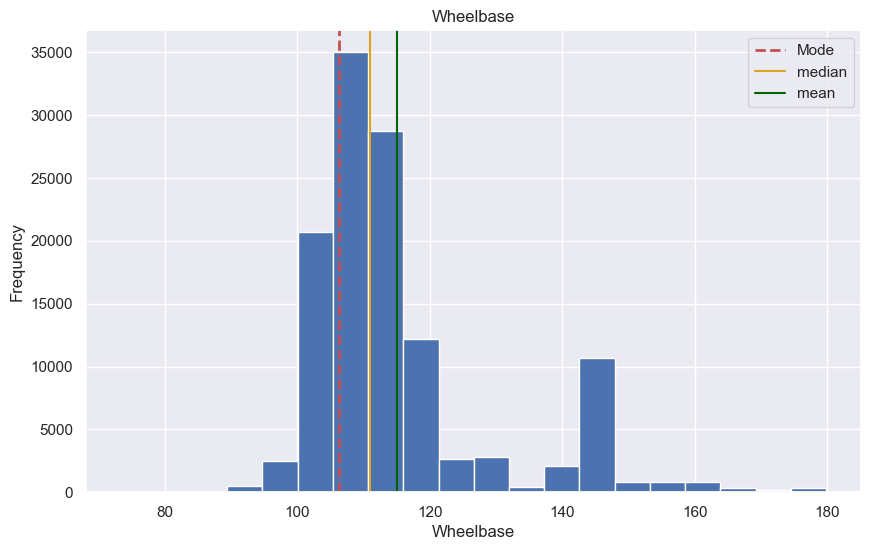

In [166]:
# plotting the distribution of the column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['wheelbase'], bins=20)
plt.title('Wheelbase')
# Add the mode
plt.axvline(cars_df2['wheelbase'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['wheelbase'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['wheelbase'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Wheelbase')
plt.ylabel('Frequency')
plt.show()

In [167]:
# filling the null values with the median of the column.
cars_df2['wheelbase'].fillna(cars_df2['wheelbase'].median(), inplace=True)

# checking the result
result = cars_df2['wheelbase'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the wheelbase column are {result.round(2)}%.")

The amount of null values in the wheelbase column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/2150957528.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['wheelbase'].fillna(cars_df2['wheelbase'].median(), inplace=True)


In [168]:
# checking how many null values are in the column
percentage = cars_df2['width'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the width column are {percentage.round(2)}%.")

The amount of null values in the width column are 5.11%.


In [169]:
# checking the value_counts of the column
cars_df2['width'].value_counts()/cars_df2.shape[0]*100

width
72.4 in   4.655
73 in     3.817
96.8 in   3.707
70.9 in   2.565
83.5 in   2.558
           ... 
94.3 in   0.001
101 in    0.001
109 in    0.001
67.2 in   0.001
93.9 in   0.001
Name: count, Length: 262, dtype: float64

In [170]:
# checking the unique values of the column
cars_df2['width'].unique()

array(['92.3 in', nan, '70 in', '78.6 in', '73 in', '72.5 in', '82.1 in',
       '73.3 in', '77.2 in', '70.5 in', '88.5 in', '72.6 in', '85.6 in',
       '72.8 in', '85.8 in', '75.4 in', '71.3 in', '75 in', '76.7 in',
       '74.6 in', '80.5 in', '85.4 in', '70.1 in', '72.4 in', '84.8 in',
       '72.2 in', '83.5 in', '72.3 in', '85.7 in', '81.3 in', '70.9 in',
       '70.8 in', '82.6 in', '83.7 in', '89.3 in', '79.8 in', '73.2 in',
       '83.8 in', '75.8 in', '74.4 in', '80 in', '69.3 in', '89.9 in',
       '76.1 in', '86.1 in', '79.5 in', '86 in', '96.8 in', '83.9 in',
       '81.7 in', '80.9 in', '79 in', '69.9 in', '90.2 in', '84.3 in',
       '71.5 in', '77.5 in', '79.4 in', '82 in', '85.5 in', '81.9 in',
       '77.6 in', '76 in', '69.7 in', '79.3 in', '79.9 in', '87.4 in',
       '81.2 in', '83.3 in', '81.4 in', '72 in', '71.7 in', '81 in',
       '70.6 in', '78.5 in', '79.7 in', '84.1 in', '70.7 in', '81.1 in',
       '78.2 in', '93.4 in', '79.6 in', '73.7 in', '74.9 in', '80.

In [171]:
# splitting the column and returning the first value
cars_df2['width'] = cars_df2['width'].str.split(" ").str[0]

# replacing "--" with a null value.
cars_df2['width'].replace("--", np.nan, inplace=True)

# converting the column to float.
cars_df2['width'] = cars_df2['width'].astype(float)

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/3365969000.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['width'].replace("--", np.nan, inplace=True)


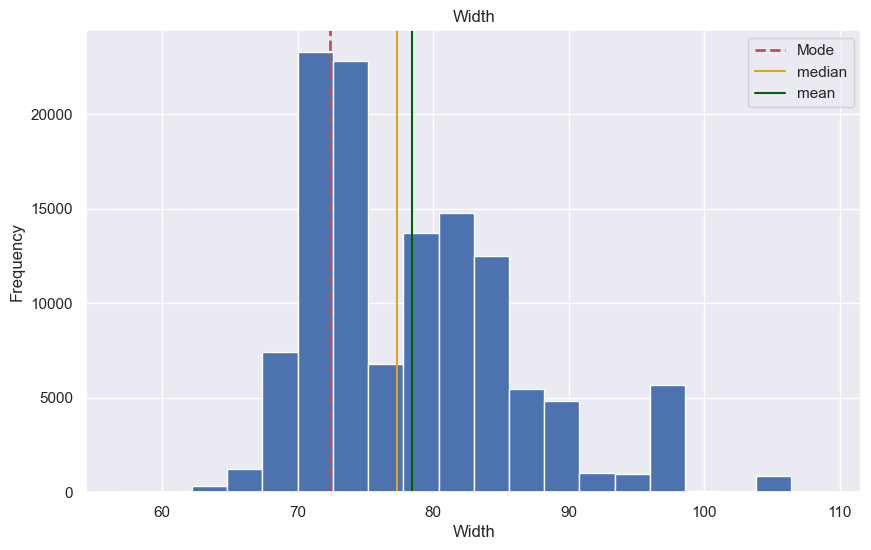

In [172]:
# plotting the distribution of the column
plt.figure(figsize=(10,6))
plt.hist(cars_df2['width'], bins=20)
plt.title('Width')
# Add the mode
plt.axvline(cars_df2['width'].mode()[0], color='r', linestyle='dashed', linewidth=2, label='Mode')
# Add the median
plt.axvline(cars_df2['width'].median(), color='goldenrod', label='median')
# Add the mean
plt.axvline(cars_df2['width'].mean(), color='darkgreen', label='mean')
plt.legend()
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()

In [173]:
# filling the null values with the mode of the column.
cars_df2['width'].fillna(cars_df2['width'].mode()[0], inplace=True)

# checking the result
result = cars_df2['width'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the width column are {result.round(2)}%.")

The amount of null values in the width column are 0.0%.


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/3041651872.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df2['width'].fillna(cars_df2['width'].mode()[0], inplace=True)


In [174]:
# checking how many null values are remaining in the dataset
cars_df2.isna().sum()

body_type                0
city                     0
daysonmarket             0
dealer_zip               0
engine_type              0
exterior_color           0
franchise_dealer         0
fuel_tank_volume         0
fuel_type                0
height                   0
horsepower               0
interior_color           0
is_new                   0
latitude                 0
length                   0
listed_date              0
listing_color            0
listing_id               0
longitude                0
make_name                0
maximum_seating          0
mileage                  0
model_name               0
price                    0
savings_amount           0
seller_rating            0
sp_name                  0
torque                   0
transmission             0
wheel_system             0
wheelbase                0
width                    0
year                     0
combined_fuel_economy    0
legroom                  0
major_options_count      0
dtype: int64

In [175]:
# checking for non-numerical columns
cars_df2.select_dtypes(exclude=np.number).columns

Index(['body_type', 'city', 'dealer_zip', 'engine_type', 'exterior_color',
       'franchise_dealer', 'fuel_type', 'interior_color', 'is_new',
       'listed_date', 'listing_color', 'make_name', 'model_name',
       'seller_rating', 'sp_name', 'transmission', 'wheel_system'],
      dtype='object')

In [176]:
# dropping the column due to redundancy
cars_df2.drop(['city'], axis=1, inplace=True)

In [177]:
cars_df2['dealer_zip'].info()

<class 'pandas.core.series.Series'>
Index: 128285 entries, W1Y4EBHY8LT026515 to 1N4AL3AP0JC274037
Series name: dealer_zip
Non-Null Count   Dtype 
--------------   ----- 
128285 non-null  object
dtypes: object(1)
memory usage: 6.0+ MB


In [178]:
!pip install zipcodes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 kB 10.9 MB/s eta 0:00:00 0:00:01


In [179]:
import zipcodes
from pprint import pprint

# creating a function to return the state of the zip code
def get_state(zip_code):
    try:
        return zipcodes.matching(zip_code)[0]['state']
    except:
        return np.nan
    
# applying the function to the column
cars_df2['dealer_state'] = cars_df2['dealer_zip'].apply(get_state)
 
# checking the result
cars_df2['dealer_state'].value_counts()

dealer_state
PA    3731
NY    2910
IL    2721
OH    2025
MD    1678
IN     956
MI     800
VA     596
DE     282
WV     201
NJ     153
WI      40
CT      31
CA      21
TX      15
MA      11
MO       9
UT       8
FL       7
TN       4
CO       3
GA       3
MN       3
OK       2
WA       2
NC       2
KS       1
WY       1
AZ       1
KY       1
AL       1
SC       1
OR       1
MT       1
HI       1
AR       1
IA       1
Name: count, dtype: int64

In [180]:
# grouping the states by region
region_dict = {'CA': 'West', 'TX': 'South', 'FL': 'South', 'NY': 'Northeast',
               'PA': 'Northeast', 'IL': 'Midwest', 'OH': 'Midwest', 'GA': 'South', 'NC': 'South'
               , 'MI': 'Midwest', 'NJ': 'Northeast', 'VA': 'South', 'WA': 'West', 'AZ': 'West',
               'MA': 'Northeast', 'TN': 'South', 'IN': 'Midwest', 'MO': 'Midwest', 'MD': 'South', 
               'CO': 'West', 'MN': 'Midwest', 'SC': 'South', 'AL': 'South', 'LA': 'South', 'WI': 'Midwest',
               'OR': 'West', 'KY': 'South', 'OK': 'South', 'CT': 'Northeast', 'IA': 'Midwest', 'NV': 'West',
               'UT': 'West', 'AR': 'South', 'MS': 'South', 'KS': 'Midwest', 'NM': 'West', 'NE': 'Midwest',
               'NH': 'Northeast', 'ID': 'West', 'ME': 'Northeast', 'RI': 'Northeast', 'WV': 'South', 'MT': 'West',
               'DE': 'South', 'AK': 'West', 'DC': 'South', 'ND': 'Midwest', 'SD': 'Midwest', 'VT': 'Northeast',
               'WY': 'West', 'HI': 'West', 'PR': 'South', 'GU': 'West', 'VI': 'South', 'MP': 'West', 'AS': 'South',
               'FM': 'West', 'MH': 'West', 'PW': 'West', 'AA': 'South', 'AE': 'South', 'AP': 'South'}

# mapping the dictionary to the column
cars_df2['dealer_region'] = cars_df2['dealer_state'].map(region_dict) 
 
# checking the result
cars_df2['dealer_region'].value_counts()

dealer_region
Northeast    6836
Midwest      6556
South        2794
West           39
Name: count, dtype: int64

In [181]:
# dropping the columns
cars_df2.drop(['dealer_zip', 'dealer_state'], axis=1, inplace=True)

In [182]:
# dropping the column
cars_df2.drop(['franchise_dealer'], axis=1, inplace=True)

In [183]:
# dropping the column
cars_df2.drop(['is_new'], axis=1, inplace=True)

In [184]:
# dropping the column
cars_df2.drop(['listed_date'], axis=1, inplace=True)

In [185]:
# dropping the column
cars_df2.drop(['listing_color'], axis=1, inplace=True)

In [186]:
# checking the value_counts of the column
top_20 = cars_df2['make_name'].value_counts()
top_20

make_name
Ford                       20379
Chevrolet                  15919
Toyota                      9911
Nissan                      9403
Honda                       9127
                           ...  
Karma                          1
Sunbeam                        1
Freightliner                   1
International Harvester        1
Saleen                         1
Name: count, Length: 63, dtype: int64

In [187]:
# checking the number of unique values in the column
cars_df2['make_name'].nunique()

63

In [188]:
# creating a list of the top 20 makes
top_20 = top_20[:20].index
 
# creating a function to return the top 20 makes
def top_20_make(make):
    if make in top_20:
        return make
    else:
        return 'Other'
    
# applying the function to the column
cars_df2['make_name'] = cars_df2['make_name'].apply(top_20_make)
 
# checking the result
cars_df2['make_name'].value_counts()

make_name
Ford             20379
Chevrolet        15919
Other            10489
Toyota            9911
Nissan            9403
Honda             9127
Jeep              7248
Hyundai           5923
Kia               5001
RAM               4547
GMC               4105
Dodge             3622
Volkswagen        3350
Subaru            3068
Mercedes-Benz     2952
Buick             2916
BMW               2682
Mazda             2296
Cadillac          2020
Lexus             1694
Audi              1633
Name: count, dtype: int64

In [189]:
# checking the value_counts of the column
cars_df2['model_name'].value_counts()

model_name
F-150                  5542
1500                   3103
Silverado 1500         3057
Equinox                2801
Escape                 2528
                       ... 
STS                       1
Intrepid                  1
Allante                   1
C/K 20                    1
F-150 SVT Lightning       1
Name: count, Length: 850, dtype: int64

In [190]:
# checking the number of unique values in the column
cars_df2['model_name'].nunique()

850

In [191]:
# instantiating the value counts
top_20 = cars_df2['model_name'].value_counts()

# creating a list of the top 20 models
top_20 = top_20[:20].index
 
# creating a function to return the top 20 models
def top_20_model(model):
    if model in top_20:
        return model
    else:
        return 'Other'
     
# applying the function to the column
cars_df2['model_name'] = cars_df2['model_name'].apply(top_20_model)

In [192]:
# checking the result
cars_df2['model_name'].value_counts()

model_name
Other             85908
F-150              5542
1500               3103
Silverado 1500     3057
Equinox            2801
Escape             2528
Rogue              2162
Explorer           2133
Grand Cherokee     1863
CR-V               1856
Fusion             1817
Camry              1809
Trax               1752
Civic              1671
Altima             1671
Accord             1594
Corolla            1569
Cherokee           1478
RAV4               1337
Malibu             1320
Tucson             1314
Name: count, dtype: int64

In [193]:
# dropping the column
cars_df2.drop(['sp_name'], axis=1, inplace=True)

In [194]:
# dropping the longitude and latitude columns
cars_df2.drop(['longitude', 'latitude'], axis=1, inplace=True)

In [195]:
# dropping the listing_id column
cars_df2.drop(['listing_id'], axis=1, inplace=True)

In [196]:
# creating a new column called 'size_of_vehicle' from the 'length', 'width', 'height', 'wheelbase' and 'fuel_tank_volume' columns
cars_df2['size_of_vehicle'] = cars_df2['length'] + cars_df2['width'] + cars_df2['height'] + cars_df2['wheelbase'] + cars_df2['fuel_tank_volume']

# dropping the 'length', 'width', 'height', and 'wheelbase' columns
cars_df2.drop(['length', 'width', 'height', 'wheelbase', 'fuel_tank_volume'], axis=1, inplace=True)

# checking the result
cars_df2.head()

,body_type,daysonmarket,engine_type,exterior_color,fuel_type,horsepower,interior_color,make_name,maximum_seating,mileage,...,seller_rating,torque,transmission,wheel_system,year,combined_fuel_economy,legroom,major_options_count,dealer_region,size_of_vehicle
vin,,,,,,,,,,,,,,,,,,,,,
W1Y4EBHY8LT026515,Van,66,V6,Silver,Diesel,188.000,Black,Mercedes-Benz,3,33.000,...,4 stars,325.000,A,4X2,2020,26.115,76.867,2.000,NaN,590.900
5UXTY9C04M9D96295,SUV / Crossover,18,Gasoline engine,Black,Gasoline,170.000,Black,BMW,5,13.000,...,4 stars,264.289,A,FWD,2021,26.115,80.164,9.000,NaN,457.279
3VWD17AJ3FM302075,Sedan,12,I4,White,Gasoline,170.000,Black,Volkswagen,5,68199.000,...,4 stars,184.000,A,FWD,2015,31.000,79.300,6.000,NaN,429.400
5FNYF8H5XLB016437,SUV / Crossover,20,V6,Blue,Gasoline,280.000,Black,Honda,5,8.000,...,3 stars,262.000,A,AWD,2020,21.500,80.500,6.000,NaN,471.800
19UUB2F64JA005573,Sedan,29,V6,White,Gasoline,290.000,Black,Other,5,32981.000,...,4 stars,267.000,A,FWD,2018,26.115,77.100,21.000,NaN,448.000


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/1077592063.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df2['size_of_vehicle'])


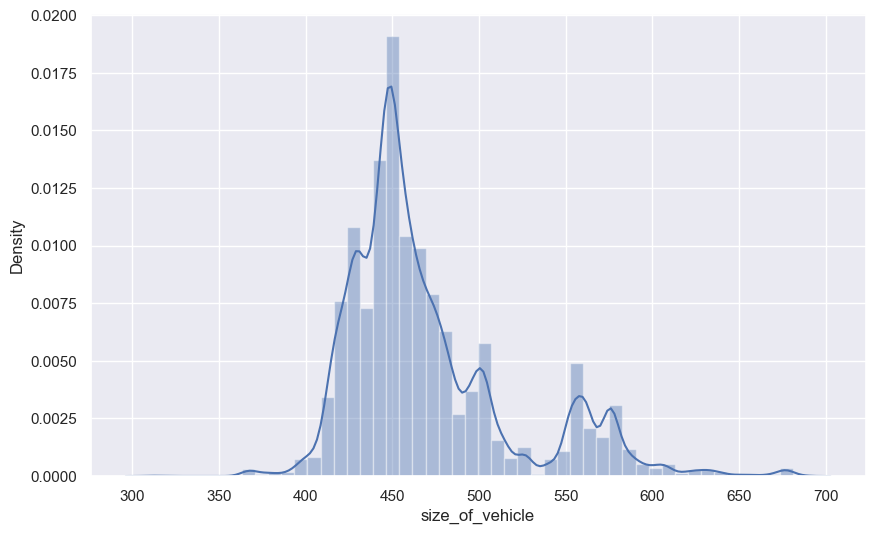

The mean of the size_of_vehicle column is 470.3061757106608.
The median of the size_of_vehicle column is 456.4999931335449.


In [197]:
# plotting the distribution of the column
plt.figure(figsize=(10, 6))
sns.distplot(cars_df2['size_of_vehicle'])
plt.show()

# checking the mean and median of the column
print(f"The mean of the size_of_vehicle column is {cars_df2['size_of_vehicle'].mean()}.")
print(f"The median of the size_of_vehicle column is {cars_df2['size_of_vehicle'].median()}.")

In [198]:
cars_df2['price'].describe()

count    128285.000
mean      31305.146
std       18519.231
min        1595.000
25%       19950.000
50%       27500.000
75%       39055.000
max     1400000.000
Name: price, dtype: float64

In [199]:
# checking the value_counts of the column
cars_df2['price'].value_counts()

price
14995.000    329
19995.000    324
15995.000    314
16995.000    300
17995.000    291
            ... 
72406.000      1
41188.000      1
50699.000      1
39269.000      1
57425.000      1
Name: count, Length: 37881, dtype: int64

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/3531268547.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df2['price'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


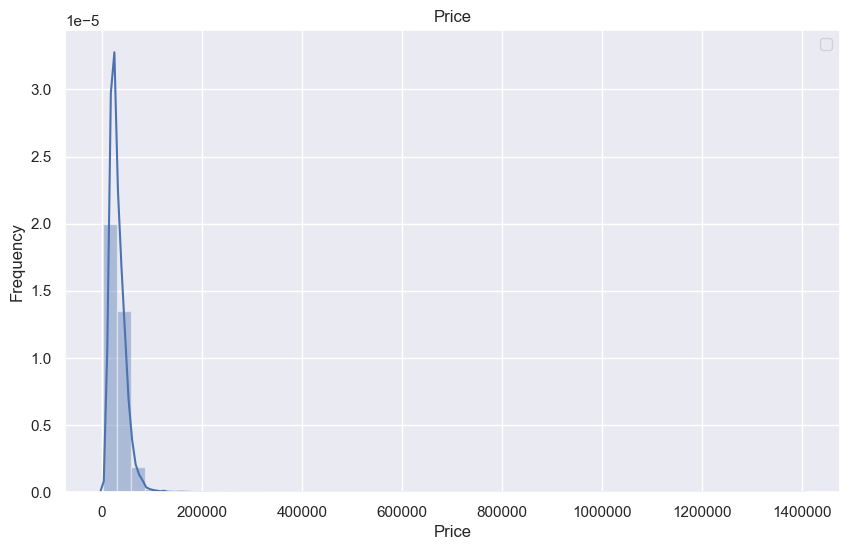

In [200]:
# plotting a histogram of the column
plt.figure(figsize=(10,6))
sns.distplot(cars_df2['price'])
plt.title('Price')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
#removing the scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.show()

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_42671/2605116485.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df2['price'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


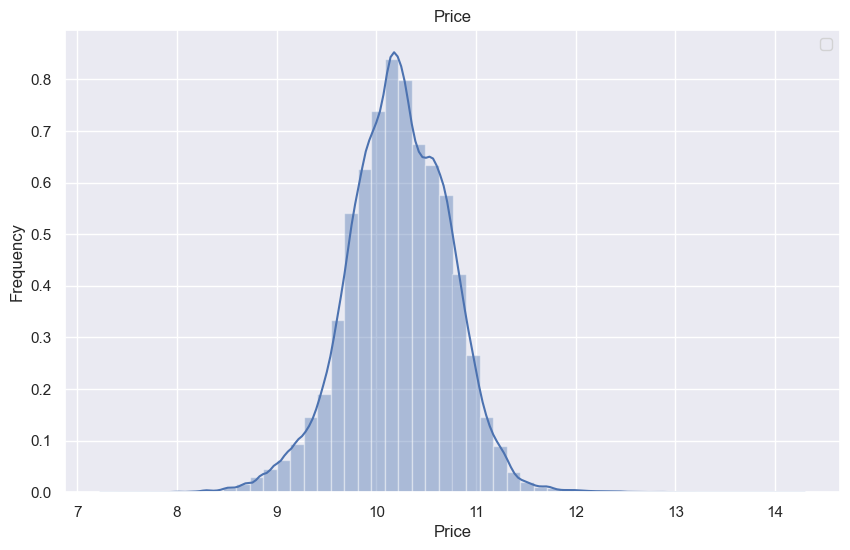

In [201]:
# normalizing the price column
cars_df2['price'] = np.log(cars_df2['price'])

# plotting the distribution of the price column
plt.figure(figsize=(10,6))
sns.distplot(cars_df2['price'])
plt.title('Price')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
#removing the scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [202]:
# checking the number of null values in the column
percentage = cars_df2['dealer_region'].isna().sum()/cars_df2.shape[0]*100

print(f"The amount of null values in the dealer_region column are {percentage}%.")

The amount of null values in the dealer_region column are 87.35237946759169%.


In [203]:
# checking the result
cars_df2['dealer_region'].value_counts()

dealer_region
Northeast    6836
Midwest      6556
South        2794
West           39
Name: count, dtype: int64

In [204]:
# checking the unique values of the column
cars_df2['dealer_region'].unique()

array([nan, 'Midwest', 'Northeast', 'South', 'West'], dtype=object)

In [205]:
# saving the dataset
cars_df2.to_csv('cleaned_used_cars_dataset.csv', index=True)